# **DSLM Predictive Project: QuestDice**


## **0. Import Libraries**

In [69]:
# import needed libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

############################################## PREPROCESSING ##############################################
from sklearn.preprocessing import MinMaxScaler

################################################# MODELS ##################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score

################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

######################################### DECISION TREES PLOTS ############################################
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

import warnings
warnings.filterwarnings('ignore')

## **1. Data Exploration**: Understand the data and extract meaningful insights





### 1.1  Basic Exploration



In [ ]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /Users/paulovalentedacruz/Downloads


In [2]:
#Import the train dataset and define the index as the 'Cust_ID'
data = pd.read_csv('/content/train.csv')
data = data.set_index('Cust_ID')
data.head()

,Buy_product,Name,Newsletter_Subscription,Year_Birth,Membership,Preferred_Game_Genre,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,...,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,Ms. Nicole Clarke,yes,1974.0,Premium,Strategy,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,1,Mr. Jesse Scott,yes,1965.0,Premium,Strategy,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,0,Mr. Christopher Carter,yes,1973.0,Premium,Strategy,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
4,1,Ms. Jennifer Morgan,yes,1993.0,Non-Premium,Party,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
5,1,Mr. Michael White,yes,1989.0,Premium,Strategy,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


In [ ]:
#Check for duplicates
data[data.duplicated()]

,Buy_product,Name,Newsletter_Subscription,Year_Birth,Membership,Preferred_Game_Genre,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,...,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation
Cust_ID,,,,,,,,,,,,,,,,,,,,,
8196,1,Ms. Abigail York,yes,1995.0,Non-Premium,Party,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9177,0,Ms. Abigail Kennedy,yes,1991.0,Premium,Thematic,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9418,1,Ms. Abigail Buchanan,yes,1972.0,Premium,Party,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


We can see that we have 3 rows that have duplicates.

In [ ]:
#Check the number of rows and columns in the dataset
data.shape

(15589, 21)

The dataset contains 15589 rows and 21 columns.

In [ ]:
#Check what types of variables we have, and if we have missing values in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Buy_product              15589 non-null  int64  
 1   Name                     15589 non-null  object 
 2   Newsletter_Subscription  15589 non-null  object 
 3   Year_Birth               15394 non-null  float64
 4   Membership               15589 non-null  object 
 5   Preferred_Game_Genre     15589 non-null  object 
 6   FidelityPoints           15589 non-null  int64  
 7   S1_GameplayExperience    15589 non-null  int64  
 8   S2_GameMechanics         15589 non-null  int64  
 9   S3_GameBalance           15589 non-null  int64  
 10  S4_GameLength            15589 non-null  int64  
 11  S5_MaterialQuality       15589 non-null  int64  
 12  S6_ValueForPrice         15589 non-null  int64  
 13  S7_Artwork_Design        15589 non-null  int64  
 14  S8_ThemeIntegration      15

We can verify that we are working with:


*   1 float variables
*   16 integer variables
*   4 object variables


We can see that the **variable `Year_Birth` has some missing values** and that it's a **float variable**. Since the variable will only accomodate integers, it will be more efficient change the variable type to integer. We will do it in the preprocessing phase.


In [ ]:
#Check if we have misclassifications in our categorical data (excluding the variable name)
print(data['Newsletter_Subscription'].value_counts(),'\n')
print(data['Membership'].value_counts(),'\n')
data['Preferred_Game_Genre'].value_counts()

Newsletter_Subscription
yes    12548
no      2874
y        167
Name: count, dtype: int64 

Membership
Premium        10756
Non-Premium     4833
Name: count, dtype: int64 



Preferred_Game_Genre
Strategy    7442
Party       7021
Thematic    1126
Name: count, dtype: int64

We can see that for the `Newsletter_Subscription` there are 167 rows that have the value of `y` and should be `yes`.

### 1.2  Basic Statistical Exploration




In [13]:
# Initialize lists to store categorical and numerical variables
categorical_columns = []
numerical_columns = []

# Iterate over columns
for column in data.columns:
    # Check if the column data type is object (categorical)
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    # Check if the column data type is numeric (int or float)
    elif data[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)


# Print identified categorical, numerical, and date columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['Name', 'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre']
Numerical columns: ['Buy_product', 'Year_Birth', 'FidelityPoints', 'S1_GameplayExperience', 'S2_GameMechanics', 'S3_GameBalance', 'S4_GameLength', 'S5_MaterialQuality', 'S6_ValueForPrice', 'S7_Artwork_Design', 'S8_ThemeIntegration', 'S9_PlayerIteration', 'S10_LevelAdjust', 'S11_RuleClarity', 'S12_StrategicThinking', 'S13_ReplayValue', 'S14_Recommendation']


We are removing the `Buy_product` columns since it will not be used in the following analysis.

In [ ]:
numerical_columns.remove('Buy_product')


#### 1.2.1 Numerical Variables

In [ ]:
#Get the main descriptive statistics for all the numeric variables
data.describe()

,Buy_product,Year_Birth,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,S4_GameLength,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation
count,15589.000000,15394.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000
mean,0.543781,1981.706444,5022.593816,2.841619,2.997242,2.844570,2.986016,3.245109,3.374816,3.506383,3.454231,3.459683,3.470845,3.700558,3.327282,3.692347,3.347360
std,0.498096,15.179042,1027.962379,1.388624,1.518994,1.436948,1.299438,1.327026,1.352417,1.319565,1.310343,1.268130,1.293873,1.158644,1.266872,1.154437,1.300452
min,0.000000,1936.000000,409.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1970.000000,4445.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,1.000000,1981.000000,5088.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,1.000000,1994.000000,5649.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,1.000000,2014.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


From above we can conclude that the **variable `S5_MaterialQuality` has an issue since it has a `max` of 6**, when the valid values should be between 0 and 5.

There also seems to be some incorrect values in the `Year_Birth`variable since the maximum value (2014) would lead to to a current age of 10.

From the 14 questions on the evaluation of the first board game, we can see that the customers consider, in average, that:
  
*   The 3 best qualities of the game are the rules clarity, the replay value and the iteration among the players.
*   The 3 worst qualities of the game are the gameplay experience, the game balance for all players and the game length (although we don't know from the question if the insatisfaction is because it is to long or to short).







In [ ]:
# Identify the customers that rated S5_MaterialQuality above 5
filtered_data = data[data['S5_MaterialQuality'] > 5]
print(f'Number of rows with question S5_MaterialQuality with grade above 5: ', filtered_data.shape[0])

Number of rows with question S5_MaterialQuality with grade above 5:  36


This will be changed in the preprocessing phase.

In [ ]:
# Identify the customers that have defined an age inferior to 14 as of today
filtered_data = data[data['Year_Birth'] > 2006]
print(f'Number of rows with birth year > 2006 (i.e., younger then 18) ', filtered_data.shape[0])

Number of rows with birth year > 2006 (i.e., younger then 18)  813


We will assume that either the customers are really younger (maybe 14 is a plausible age to buy online with the help of a parent) or that the customer didn't want to share the birth year. Either way, we will keep the values as they are (will only need to deal with the NAs in the preprocessing phase).

#### 1.2.2 Categorical Variables

In [14]:
# Statistical Analysis for Categorical Features
data[categorical_columns].describe()

,Name,Newsletter_Subscription,Membership,Preferred_Game_Genre
count,15586,15586,15586,15586
unique,14227,2,2,3
top,Mr. Michael Smith,yes,Premium,Strategy
freq,9,12712,10754,7442


In [ ]:
data['Preferred_Game_Genre'].value_counts()

Preferred_Game_Genre
Strategy    7442
Party       7021
Thematic    1126
Name: count, dtype: int64

We can see that:

- `name`: we have some customers with the same name, but they are not duplicates (we removed the duplicates before).
- `Newsletter_Subscription`: about 81.5% of the customers subscribe to the Newsletter.
- `Membership`: about 69% of the customers have a Premium membership
- `Preferred_Game_Genre`: from the 3 game genre, strategy is the most appreciated (47.8%), party is the second one (45%) and thematic is the last one (7.2%).

In [ ]:
#validate the gender
data_categorical=data['Name'].str.split().str[0]
g = data_categorical.apply(lambda x: 'M' if 'Mr' in x else 'F')
print(g.value_counts())

Name
F    7985
M    7604
Name: count, dtype: int64


The prevelant gender is female with 51.2%.

#### 1.2.3 Kurtosis Analysis

In [ ]:
data[numerical_columns].kurt()

Year_Birth              -0.729800
FidelityPoints           0.260135
S1_GameplayExperience   -0.935544
S2_GameMechanics        -1.077243
S3_GameBalance          -0.967047
S4_GameLength           -1.076583
S5_MaterialQuality      -1.111251
S6_ValueForPrice        -0.540657
S7_Artwork_Design       -0.858889
S8_ThemeIntegration     -0.931811
S9_PlayerIteration      -0.772663
S10_LevelAdjust         -0.864644
S11_RuleClarity         -0.225016
S12_StrategicThinking   -0.812149
S13_ReplayValue         -0.225183
S14_Recommendation      -0.949765
dtype: float64

 A standard normal distribution has a kurtosis of 3, so values higher than that could indicate presence of outliers.

#### 1.2.4 Skewness Analysis

In [ ]:
data[numerical_columns].skew()

Year_Birth              -0.003847
FidelityPoints          -0.453779
S1_GameplayExperience   -0.100907
S2_GameMechanics        -0.260705
S3_GameBalance          -0.123610
S4_GameLength           -0.050229
S5_MaterialQuality      -0.171255
S6_ValueForPrice        -0.599498
S7_Artwork_Design       -0.554561
S8_ThemeIntegration     -0.472074
S9_PlayerIteration      -0.503381
S10_LevelAdjust         -0.482952
S11_RuleClarity         -0.750689
S12_StrategicThinking   -0.382588
S13_ReplayValue         -0.745131
S14_Recommendation      -0.358297
dtype: float64

If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric. If the skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If the skewness is less than -1 or greater than 1, the distribution is highly skewed.

#### 1.2.5 Visualization

**Histograms**

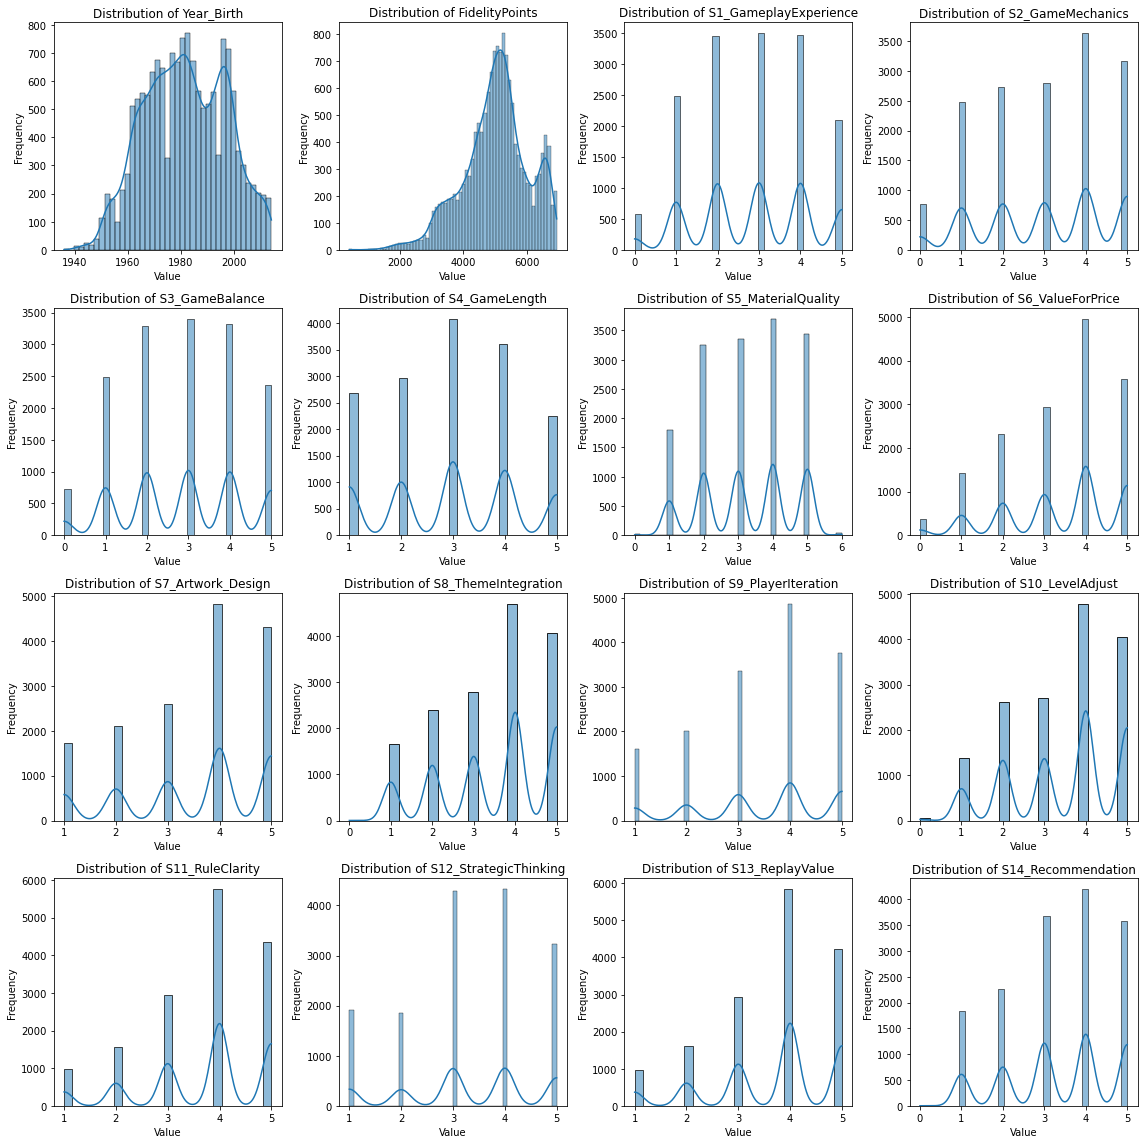

In [ ]:
# Identify the length of the list to calculate the subplots
num_vars = len(numerical_columns)
rows = (num_vars + 1) // 4

fig, axes = plt.subplots(rows, 4, figsize=(16, 4*rows))

# Iterate over numerical variables and plot their distribution in the subplot grid
for i, num_var in enumerate(numerical_columns):
    row_idx = i // 4
    col_idx = i % 4
    sns.histplot(data[num_var], kde=True, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel('Value')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Distribution of {num_var}')

# Remove empty subplot(s) if the number of numerical variables is odd
if num_vars % 2 != 0:
    fig.delaxes(axes[rows - 1, 1])

plt.tight_layout()
plt.show();

**Boxplots**

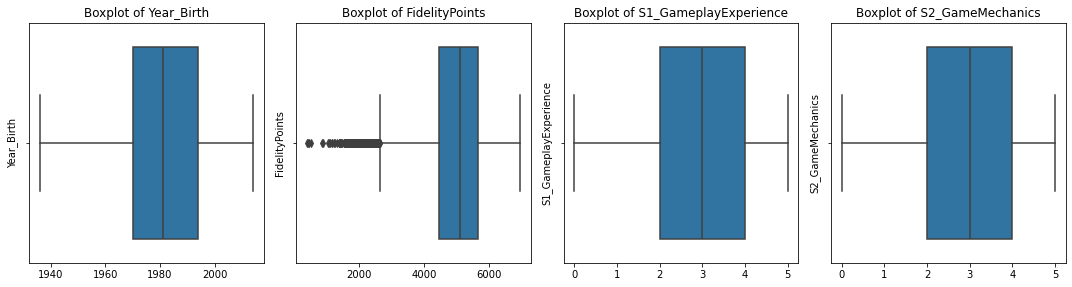

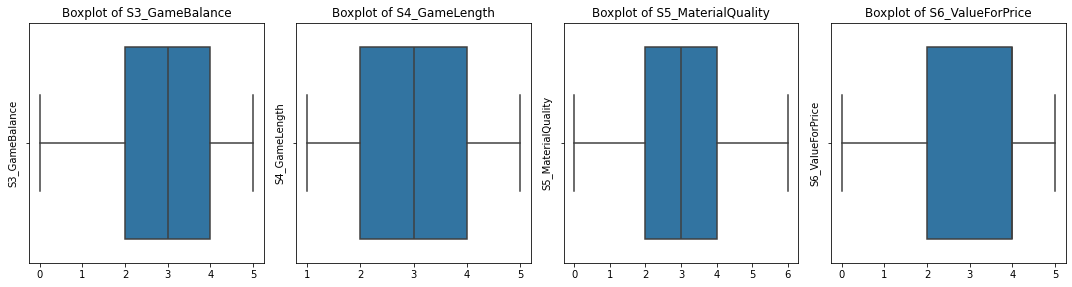

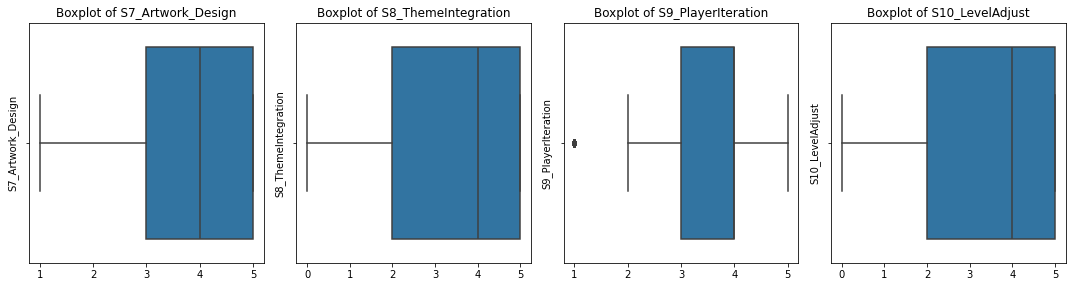

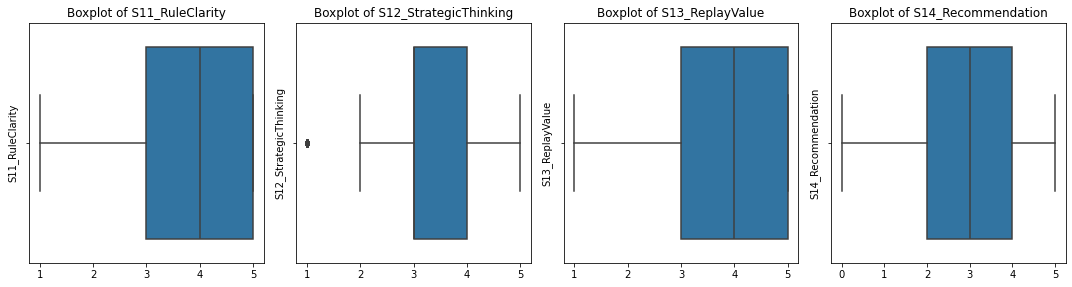

In [ ]:
# Plot boxplots for each numerical variable
num_plots = len(numerical_columns)
num_plots_per_row = 4
num_rows = -(-num_plots // num_plots_per_row)

for i in range(0, num_plots, num_plots_per_row):
    plt.figure(figsize=(15, 15))
    for j, num_var in enumerate(numerical_columns[i:i+num_plots_per_row]):
        plt.subplot(num_rows, num_plots_per_row, j + 1)
        sns.boxplot(x=num_var, data=data)
        plt.title(f'Boxplot of {num_var}')
        plt.xlabel('')
        plt.ylabel(num_var)  # Set y-axis label to variable name
    plt.tight_layout()  # Adjust layout to prevent overlap of subplots
    plt.show()

From the box plots we can see that we have clear outliers in the variables `FidelityPoints`, `S9_PlayerIteration` and `S12_StrategicThinking`.

**Distribution Graphs**

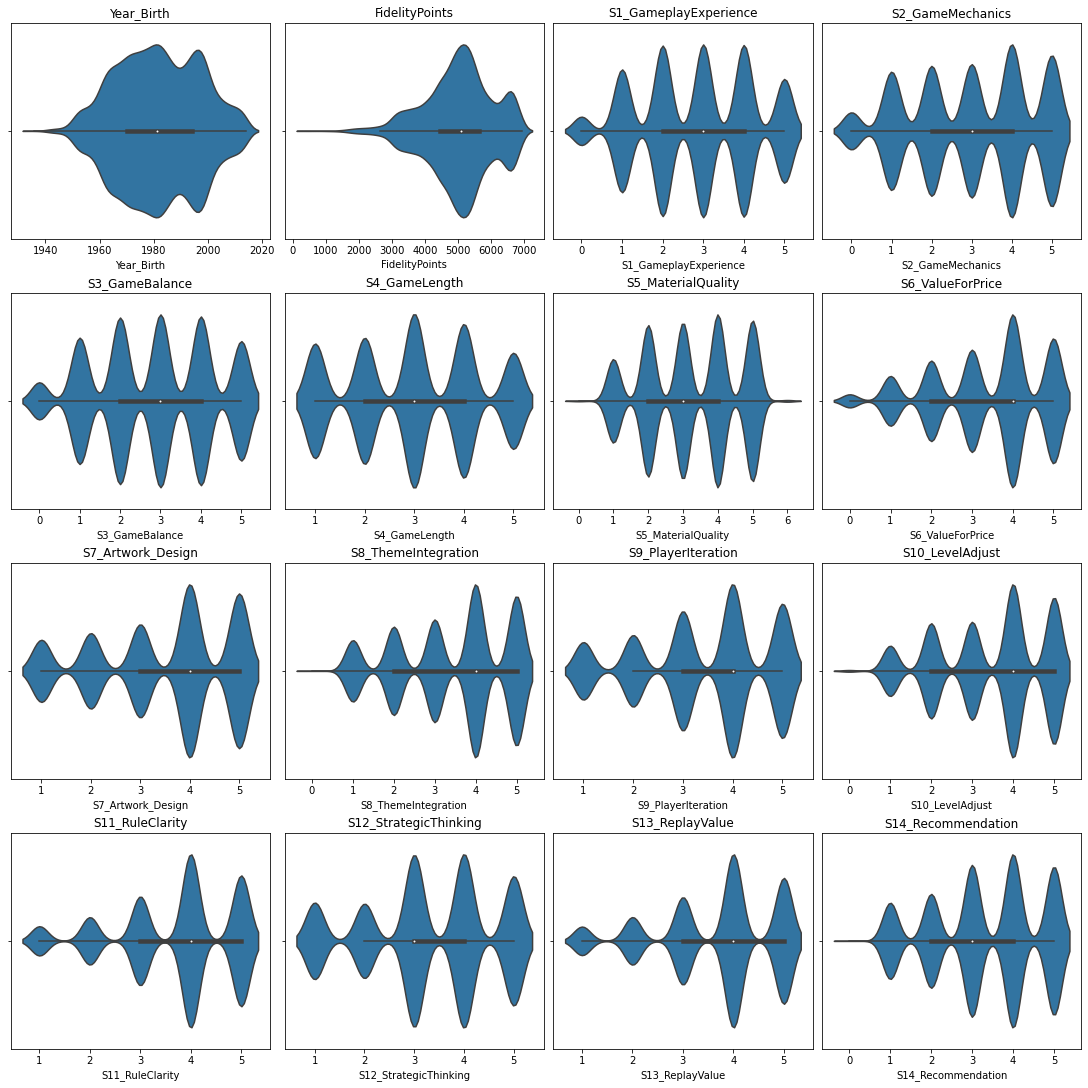

In [ ]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15), constrained_layout=True)

# Iterate through the numerical variables and create a violin plot for each
for ax, var in zip(axes.flatten(), data[numerical_columns]):
    sns.violinplot(x=var, data=data, ax=ax)
    ax.set_title(var)
    ax.set_xlabel(var)

# Adjust the layout and show the figure
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.935, wspace=None, hspace=0.4)
plt.show()

**Correlation Heatmap**

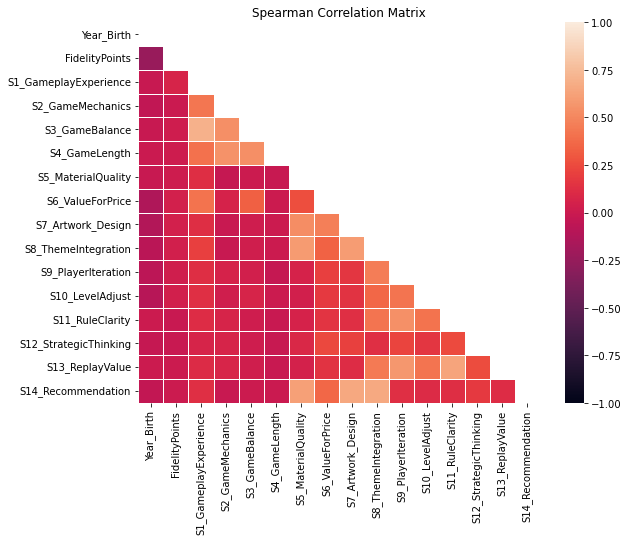

In [ ]:
plt.figure(figsize=(9, 7))
corr = data[numerical_columns].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt = '.1g', linewidths=0.5, vmin=-1, vmax=1, mask=mask, annot_kws={"fontsize":7})
plt.title('Spearman Correlation Matrix')
plt.show()

**Strip Plots**

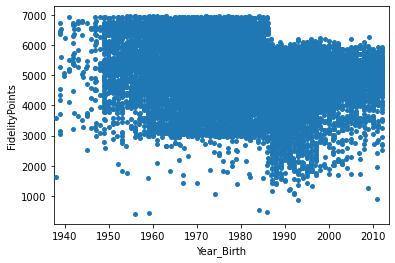

In [ ]:
sns.stripplot(x='Year_Birth', y='FidelityPoints', data=data);
plt.xticks([2, 12, 22, 32, 42, 52, 62, 72], ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010'])
plt.show()

#### 1.2.6 Missing Values

In [ ]:
#Check how many missing values we have in the dataset
data.isna().sum()

Buy_product                  0
Name                         0
Newsletter_Subscription      0
Year_Birth                 195
Membership                   0
Preferred_Game_Genre         0
FidelityPoints               0
S1_GameplayExperience        0
S2_GameMechanics             0
S3_GameBalance               0
S4_GameLength                0
S5_MaterialQuality           0
S6_ValueForPrice             0
S7_Artwork_Design            0
S8_ThemeIntegration          0
S9_PlayerIteration           0
S10_LevelAdjust              0
S11_RuleClarity              0
S12_StrategicThinking        0
S13_ReplayValue              0
S14_Recommendation           0
dtype: int64

We have 195 missing values (NAs) in the variable `Year_Birth`.

## **2. Data Preprocessing**: Prepare the data for modeling

### 2.1 Remove Duplicates

In [3]:
#Drop the duplicates
print (f'Number of rows before removing duplicates: ', data.shape[0])
data.drop_duplicates(inplace = True)
print (f'Number of rows after removing duplicates: ', data.shape[0])

Number of rows before removing duplicates:  15589
Number of rows after removing duplicates:  15586


### 2.2 Handle Missing Values

In [4]:
# Remove rows with missing Year_Birth values
data.fillna({'Year_Birth': data['Year_Birth'].median()}, inplace=True)

Although we have the option to remove the rows with NA since the number of rows is reduced related to the dataset (about 1,3%), we decided instead to use the median and keep as much data as possible for the training.



In [5]:
#Check how many missing values we have in the dataset
data.isna().sum()

Buy_product                0
Name                       0
Newsletter_Subscription    0
Year_Birth                 0
Membership                 0
Preferred_Game_Genre       0
FidelityPoints             0
S1_GameplayExperience      0
S2_GameMechanics           0
S3_GameBalance             0
S4_GameLength              0
S5_MaterialQuality         0
S6_ValueForPrice           0
S7_Artwork_Design          0
S8_ThemeIntegration        0
S9_PlayerIteration         0
S10_LevelAdjust            0
S11_RuleClarity            0
S12_StrategicThinking      0
S13_ReplayValue            0
S14_Recommendation         0
dtype: int64

### 2.3 Correct the Variable Type

In [6]:
# Change the varialbe type of 'Year_Birth' from float to int
data['Year_Birth'] = data['Year_Birth'].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Buy_product              15586 non-null  int64 
 1   Name                     15586 non-null  object
 2   Newsletter_Subscription  15586 non-null  object
 3   Year_Birth               15586 non-null  int64 
 4   Membership               15586 non-null  object
 5   Preferred_Game_Genre     15586 non-null  object
 6   FidelityPoints           15586 non-null  int64 
 7   S1_GameplayExperience    15586 non-null  int64 
 8   S2_GameMechanics         15586 non-null  int64 
 9   S3_GameBalance           15586 non-null  int64 
 10  S4_GameLength            15586 non-null  int64 
 11  S5_MaterialQuality       15586 non-null  int64 
 12  S6_ValueForPrice         15586 non-null  int64 
 13  S7_Artwork_Design        15586 non-null  int64 
 14  S8_ThemeIntegration      15586 non-null  in

### 2.4 Data Incosistencies: variable `S5_MaterialQuality`

In point 2.2.1, we identified that 36 rows have a value in the `S5_MaterialQuality` variable euqal to 6, when the options should be one of {0, 1, 2, 3, 4, 5}. We could remove this 36 rows (it's only 0.2% of my dataset) but we believe that the value 6 was a mistake and should be replaced with the nearest valid value (e.g., 5).

In [8]:
# Replace anomalous S5_MaterialQuality values with 5
data.loc[data['S5_MaterialQuality'] == 6, 'S5_MaterialQuality'] = 5

In [9]:
#Get the main descriptive statistics for all the numeric variables
data.describe()

,Buy_product,Year_Birth,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,S4_GameLength,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation
count,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000
mean,0.543757,1981.696779,5022.418581,2.841332,2.997049,2.844412,2.985821,3.242654,3.374631,3.506288,3.454190,3.459579,3.470871,3.700500,3.327409,3.692288,3.347427
std,0.498098,15.084697,1027.940126,1.388541,1.519035,1.436937,1.299438,1.323131,1.352419,1.319625,1.310401,1.268180,1.293782,1.158693,1.266944,1.154484,1.300371
min,0.000000,1936.000000,409.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1970.000000,4445.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,1.000000,1981.000000,5088.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,1.000000,1994.000000,5648.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,1.000000,2014.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### 2.5 Data Incosistencies: variable `Newsletter_Subscription`

In the Basic Exploration (point 2.1) we identified that when customers has the `Newsletter_Subscription` active, we have records of both `yes` and `y`. We are going to put all those rows with the value `yes`.

In [10]:
#Replace 'y' for 'yes' in the 'Newsletter_Subscription' variable
data['Newsletter_Subscription'] = data['Newsletter_Subscription'].replace('y', 'yes')

In [15]:
# Statistical Analysis for Categorical Features
data[categorical_columns].describe()

,Name,Newsletter_Subscription,Membership,Preferred_Game_Genre
count,15586,15586,15586,15586
unique,14227,2,2,3
top,Mr. Michael Smith,yes,Premium,Strategy
freq,9,12712,10754,7442


We can now see that we have only 2 unique values for the `Newsletter_Subscription` variable.

### 2.6  Remove Outliers

In [ ]:
#Checkpoint
data_bkp = data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Buy_product              15586 non-null  int64 
 1   Name                     15586 non-null  object
 2   Newsletter_Subscription  15586 non-null  object
 3   Year_Birth               15586 non-null  int64 
 4   Membership               15586 non-null  object
 5   Preferred_Game_Genre     15586 non-null  object
 6   FidelityPoints           15586 non-null  int64 
 7   S1_GameplayExperience    15586 non-null  int64 
 8   S2_GameMechanics         15586 non-null  int64 
 9   S3_GameBalance           15586 non-null  int64 
 10  S4_GameLength            15586 non-null  int64 
 11  S5_MaterialQuality       15586 non-null  int64 
 12  S6_ValueForPrice         15586 non-null  int64 
 13  S7_Artwork_Design        15586 non-null  int64 
 14  S8_ThemeIntegration      15586 non-null  in

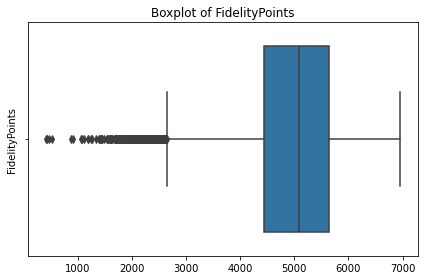

In [ ]:
num_var='FidelityPoints'
sns.boxplot(x=num_var, data=data)
plt.title(f'Boxplot of {num_var}')
plt.xlabel('')
plt.ylabel(num_var)  # Set y-axis label to variable name
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

Although looking to the above Boxplot we identify some outliers, we decided to change the variable with a sqrt transform later on.

In [ ]:
data['S9_PlayerIteration'].value_counts()

S9_PlayerIteration
4    4864
5    3762
3    3345
2    2005
1    1610
Name: count, dtype: int64

In [ ]:
data['S12_StrategicThinking'].value_counts()

S12_StrategicThinking
4    4325
3    4283
5    3221
1    1907
2    1850
Name: count, dtype: int64

Looking at the boxplots it seems that we have ouliers in both the `S9_PlayerIteration` and `S12_StrategicThinking` variables. However, looking at the distribution we can see that the values that are idenified as outliers don't occur with very low frequency compared to others. In this way, they cannot be considered outliers.

### 2.7 Feature Engineering

#### 2.7.1 Add `Male` Variable

Since we have all the names of the customers starting either from 'Mr' or 'Ms', we can create a new variable, that we named `Male`, to identify the gender of the customer. It will be binary and have 1 for male and 0 for female.

In [16]:
data['Male'] = data['Name'].apply(lambda x: 1 if x.startswith('Mr') else 0)
data['Male'].value_counts()

Male
0    7982
1    7604
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Buy_product              15586 non-null  int64 
 1   Name                     15586 non-null  object
 2   Newsletter_Subscription  15586 non-null  object
 3   Year_Birth               15586 non-null  int64 
 4   Membership               15586 non-null  object
 5   Preferred_Game_Genre     15586 non-null  object
 6   FidelityPoints           15586 non-null  int64 
 7   S1_GameplayExperience    15586 non-null  int64 
 8   S2_GameMechanics         15586 non-null  int64 
 9   S3_GameBalance           15586 non-null  int64 
 10  S4_GameLength            15586 non-null  int64 
 11  S5_MaterialQuality       15586 non-null  int64 
 12  S6_ValueForPrice         15586 non-null  int64 
 13  S7_Artwork_Design        15586 non-null  int64 
 14  S8_ThemeIntegration      15586 non-null  in

#### 2.7.2 Add `Age`Variable

In [17]:
from datetime import date
data['Age'] = date.today().year - data['Year_Birth']
data['Age'].value_counts().sort_index()

Age
10     84
11    101
12     98
13     96
14    106
     ... 
80     16
81      6
82      3
83     13
88      2
Name: count, Length: 75, dtype: int64

#### 2.7.3 Add `Global_Satisfation` Variable

In [18]:
score_columns = [
    'S1_GameplayExperience', 'S2_GameMechanics', 'S3_GameBalance', 'S4_GameLength',
    'S5_MaterialQuality', 'S6_ValueForPrice', 'S7_Artwork_Design', 'S8_ThemeIntegration',
    'S9_PlayerIteration', 'S10_LevelAdjust', 'S11_RuleClarity', 'S12_StrategicThinking',
    'S13_ReplayValue', 'S14_Recommendation'
]
data['Global_Satisfation'] = data[score_columns].mean(axis=1)
data.head()

,Buy_product,Name,Newsletter_Subscription,Year_Birth,Membership,Preferred_Game_Genre,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,...,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation,Male,Age,Global_Satisfation
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,Ms. Nicole Clarke,yes,1974,Premium,Strategy,4907,3,4,1,...,3,3,3,3,4,3,4,0,50,3.285714
2,1,Mr. Jesse Scott,yes,1965,Premium,Strategy,6724,1,1,1,...,5,5,5,5,1,5,2,1,59,3.142857
3,0,Mr. Christopher Carter,yes,1973,Premium,Strategy,4365,3,3,3,...,3,3,2,3,2,3,1,1,51,2.714286
4,1,Ms. Jennifer Morgan,yes,1993,Non-Premium,Party,3849,1,1,1,...,4,4,4,4,4,4,3,0,31,3.142857
5,1,Mr. Michael White,yes,1989,Premium,Strategy,5376,2,2,3,...,5,5,3,4,1,3,5,1,35,3.571429


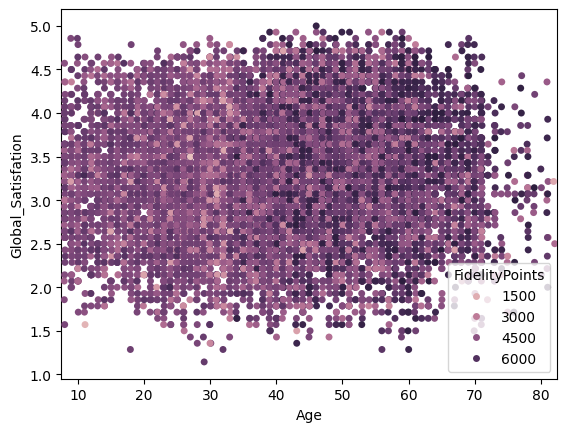

In [19]:
sns.stripplot(x='Age', y='Global_Satisfation', data=data, hue='FidelityPoints');
plt.xticks([2, 12, 22, 32, 42, 52, 62, 72], ['10', '20', '30', '40', '50', '60', '70', '80'])
plt.show()

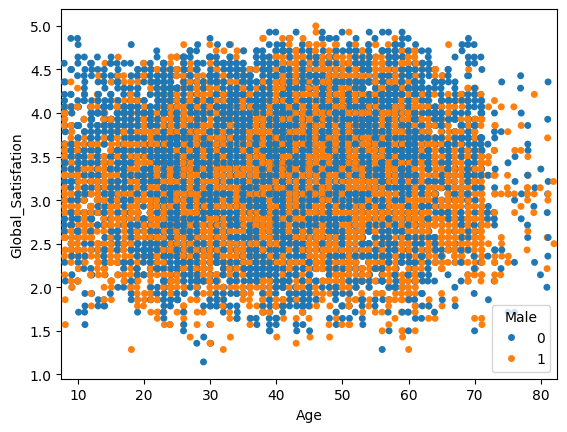

In [20]:
sns.stripplot(x='Age', y='Global_Satisfation', data=data, hue='Male');
plt.xticks([2, 12, 22, 32, 42, 52, 62, 72], ['10', '20', '30', '40', '50', '60', '70', '80'])
plt.show()

In [21]:
numerical_columns.remove('Year_Birth')
numerical_columns.append('Male')
numerical_columns.append('Age')
numerical_columns.append('Global_Satisfation')

In [22]:
numerical_columns

['Buy_product',
 'FidelityPoints',
 'S1_GameplayExperience',
 'S2_GameMechanics',
 'S3_GameBalance',
 'S4_GameLength',
 'S5_MaterialQuality',
 'S6_ValueForPrice',
 'S7_Artwork_Design',
 'S8_ThemeIntegration',
 'S9_PlayerIteration',
 'S10_LevelAdjust',
 'S11_RuleClarity',
 'S12_StrategicThinking',
 'S13_ReplayValue',
 'S14_Recommendation',
 'Male',
 'Age',
 'Global_Satisfation']

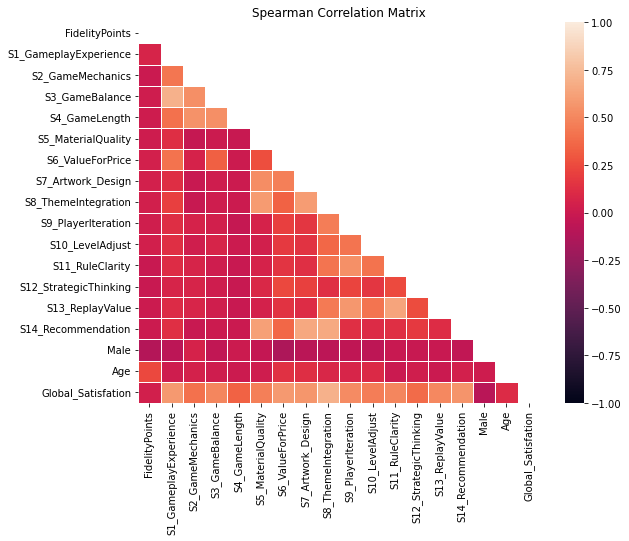

In [ ]:
plt.figure(figsize=(9, 7))
corr = data[numerical_columns].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt = '.1g', linewidths=0.5, vmin=-1, vmax=1, mask=mask, annot_kws={"fontsize":7})
plt.title('Spearman Correlation Matrix')
plt.show()

We can see that there is no correlation whatsoever of this variable to any of the others in the dataset so it seems that it will probably be a vraible to remove in the next phase.

#### 2.7.4 Binary Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Buy_product              15586 non-null  int64  
 1   Name                     15586 non-null  object 
 2   Newsletter_Subscription  15586 non-null  object 
 3   Year_Birth               15586 non-null  int64  
 4   Membership               15586 non-null  object 
 5   Preferred_Game_Genre     15586 non-null  object 
 6   FidelityPoints           15586 non-null  int64  
 7   S1_GameplayExperience    15586 non-null  int64  
 8   S2_GameMechanics         15586 non-null  int64  
 9   S3_GameBalance           15586 non-null  int64  
 10  S4_GameLength            15586 non-null  int64  
 11  S5_MaterialQuality       15586 non-null  int64  
 12  S6_ValueForPrice         15586 non-null  int64  
 13  S7_Artwork_Design        15586 non-null  int64  
 14  S8_ThemeIntegration      15

In [23]:
one_hot_encoded_data = []
one_hot_encoded_data = pd.get_dummies(data, columns = ['Membership', 'Newsletter_Subscription'])
print(one_hot_encoded_data)

         Buy_product                    Name  Year_Birth Preferred_Game_Genre  \
Cust_ID                                                                         
1                  0       Ms. Nicole Clarke        1974             Strategy   
2                  1         Mr. Jesse Scott        1965             Strategy   
3                  0  Mr. Christopher Carter        1973             Strategy   
4                  1     Ms. Jennifer Morgan        1993                Party   
5                  1       Mr. Michael White        1989             Strategy   
...              ...                     ...         ...                  ...   
15585              0       Ms. Wendy Roberts        1988                Party   
15586              0         Ms. Sonya Smith        2000                Party   
15587              1      Mr. Maxwell Wright        1964             Strategy   
15588              1       Mr. Gregory Moran        1992                Party   
15589              0       M

In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Buy_product                  15586 non-null  int64  
 1   Name                         15586 non-null  object 
 2   Year_Birth                   15586 non-null  int64  
 3   Preferred_Game_Genre         15586 non-null  object 
 4   FidelityPoints               15586 non-null  int64  
 5   S1_GameplayExperience        15586 non-null  int64  
 6   S2_GameMechanics             15586 non-null  int64  
 7   S3_GameBalance               15586 non-null  int64  
 8   S4_GameLength                15586 non-null  int64  
 9   S5_MaterialQuality           15586 non-null  int64  
 10  S6_ValueForPrice             15586 non-null  int64  
 11  S7_Artwork_Design            15586 non-null  int64  
 12  S8_ThemeIntegration          15586 non-null  int64  
 13  S9_PlayerIteration   

In [24]:
one_hot_encoded_data.drop(['Membership_Non-Premium', 'Newsletter_Subscription_no'], axis = 1, inplace = True)

In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Buy_product                  15586 non-null  int64  
 1   Name                         15586 non-null  object 
 2   Year_Birth                   15586 non-null  int64  
 3   Preferred_Game_Genre         15586 non-null  object 
 4   FidelityPoints               15586 non-null  int64  
 5   S1_GameplayExperience        15586 non-null  int64  
 6   S2_GameMechanics             15586 non-null  int64  
 7   S3_GameBalance               15586 non-null  int64  
 8   S4_GameLength                15586 non-null  int64  
 9   S5_MaterialQuality           15586 non-null  int64  
 10  S6_ValueForPrice             15586 non-null  int64  
 11  S7_Artwork_Design            15586 non-null  int64  
 12  S8_ThemeIntegration          15586 non-null  int64  
 13  S9_PlayerIteration   

In [25]:
one_hot_encoded_data=one_hot_encoded_data.drop('Name', axis = 1)
one_hot_encoded_data=one_hot_encoded_data.drop('Year_Birth', axis = 1)

In [26]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Buy_product                  15586 non-null  int64  
 1   Preferred_Game_Genre         15586 non-null  object 
 2   FidelityPoints               15586 non-null  int64  
 3   S1_GameplayExperience        15586 non-null  int64  
 4   S2_GameMechanics             15586 non-null  int64  
 5   S3_GameBalance               15586 non-null  int64  
 6   S4_GameLength                15586 non-null  int64  
 7   S5_MaterialQuality           15586 non-null  int64  
 8   S6_ValueForPrice             15586 non-null  int64  
 9   S7_Artwork_Design            15586 non-null  int64  
 10  S8_ThemeIntegration          15586 non-null  int64  
 11  S9_PlayerIteration           15586 non-null  int64  
 12  S10_LevelAdjust              15586 non-null  int64  
 13  S11_RuleClarity      

# Power Transform

In [27]:
one_hot_encoded_data['sqrt_FidelityPoints'] = one_hot_encoded_data['FidelityPoints'] ** 0.5

# 2.8 Feature Selection: Select the most relevant features for the model

In [28]:
from sklearn.model_selection import StratifiedKFold

In [29]:
skf = StratifiedKFold(n_splits = 10, random_state = 99, shuffle = True)

In [30]:
X = one_hot_encoded_data.drop('Buy_product', axis = 1)
y = one_hot_encoded_data['Buy_product'].copy()

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Preferred_Game_Genre         15586 non-null  object 
 1   FidelityPoints               15586 non-null  int64  
 2   S1_GameplayExperience        15586 non-null  int64  
 3   S2_GameMechanics             15586 non-null  int64  
 4   S3_GameBalance               15586 non-null  int64  
 5   S4_GameLength                15586 non-null  int64  
 6   S5_MaterialQuality           15586 non-null  int64  
 7   S6_ValueForPrice             15586 non-null  int64  
 8   S7_Artwork_Design            15586 non-null  int64  
 9   S8_ThemeIntegration          15586 non-null  int64  
 10  S9_PlayerIteration           15586 non-null  int64  
 11  S10_LevelAdjust              15586 non-null  int64  
 12  S11_RuleClarity              15586 non-null  int64  
 13  S12_StrategicThinking

### 2.8.1 Categorical Features

#### 2.8.1.1. Chi-Square (Filter Method) - For categorical data

In [ ]:
def apply_chisquare(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [ ]:
def select_best_cat_features(X,y):
    count = 1

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using chi-square
        X_train_cat = X_train[['Preferred_Game_Genre','Male','Membership_Premium','Newsletter_Subscription_yes']].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var],y_train, var)

        count+=1

In [ ]:
select_best_cat_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Preferred_Game_Genre is IMPORTANT for Prediction
Male is IMPORTANT for Prediction
Membership_Premium is IMPORTANT for Prediction
Newsletter_Subscription_yes is IMPORTANT for Prediction
_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________
Preferred_Game_Genre is IMPORTANT for Prediction
Male is IMPORTANT for Prediction
Membership_Premium is IMPORTANT for Prediction
Newsletter_Subscription_yes is IMPORTANT for Prediction
__________________________________________________________________________

The conclusion is that all the 4 variables are important and should be kept.

### 2.8.2 Numerical Features

In [ ]:
numerical_columns = X.select_dtypes(include=[np.number]).columns

#### 2.8.2.1 Variance (Filter Method) - For continuous, ordinal and binary data

In [ ]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

In [ ]:
def select_features_variance(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        for var in numerical_columns:
          apply_variance(X_train[var], var)

        count+=1

In [ ]:
select_features_variance(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
FidelityPoints:1046548.5189307302
S1_GameplayExperience:1.9278448458027173
S2_GameMechanics:2.2988021786952992
S3_GameBalance:2.061384894469936
S4_GameLength:1.6836002282819114
S5_MaterialQuality:1.7575191683603084
S6_ValueForPrice:1.82903464444643
S7_Artwork_Design:1.7355796912863382
S8_ThemeIntegration:1.7196518323713985
S9_PlayerIteration:1.6119677669162031
S10_LevelAdjust:1.6672084029831002
S11_RuleClarity:1.3385162413800742
S12_StrategicThinking:1.6090581087983633
S13_ReplayValue:1.335623539418504
S14_Recommendation:1.6952634309149621
Male:0.24980108283762414
Age:228.84119133425338
Global_Satisfation:0.44651989159622174
sqrt_FidelityPoints:57.517550464906584
__________________________________________________

The conclusion is that there are no constant features, so no variables will be removed.

#### 2.8.2.2 Spearman Correlation (Filter Method) - For continuous and ordinal data

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

Remove the binary variables: `Male`, `Membership_Premium` and `Newsletter_Subscription_yes`.


In [ ]:
def apply_correlation(X_train):
    correlation_data = X_train.drop(['Male', 'Membership_Premium', 'Newsletter_Subscription_yes'], axis = 1).copy()
    matrix = correlation_data.corr(method = 'spearman', numeric_only = True)
    cor_heatmap(matrix)

In [ ]:
def redundant_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using spearman correlation
        apply_correlation(X_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


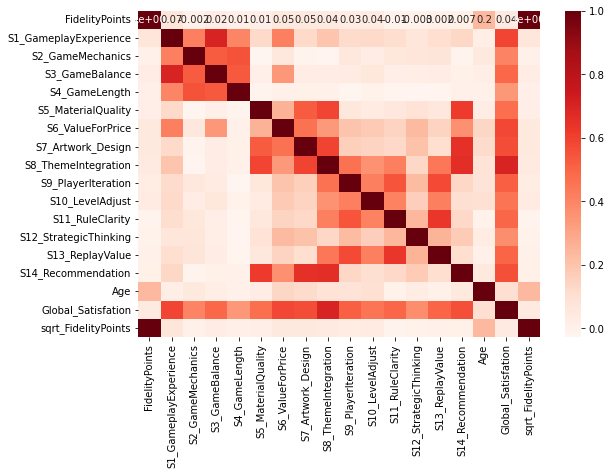

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


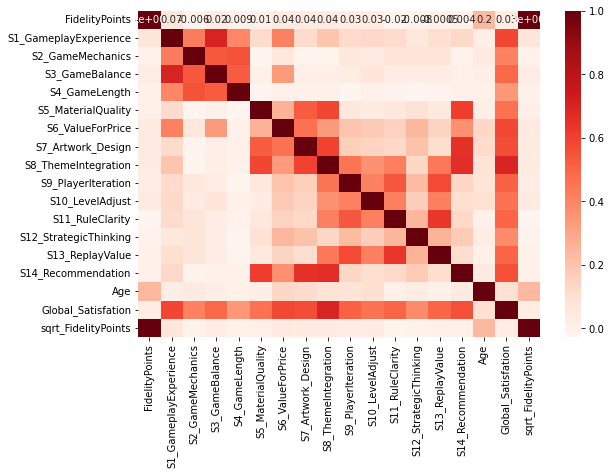

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


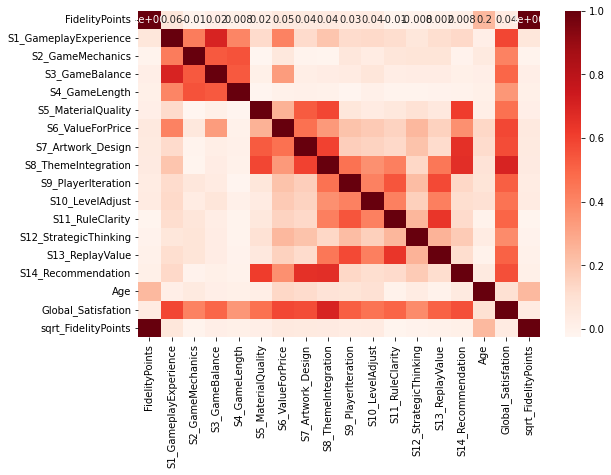

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


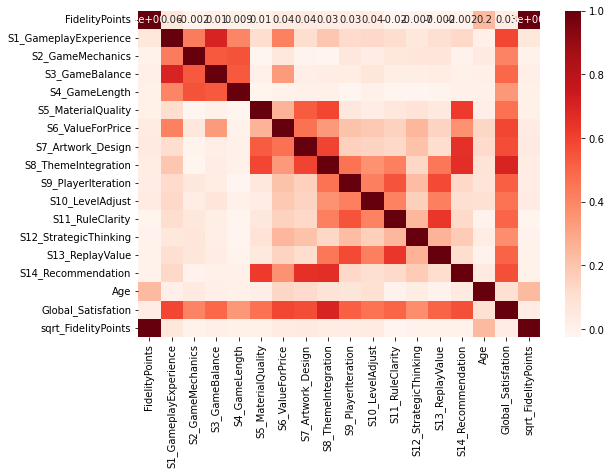

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


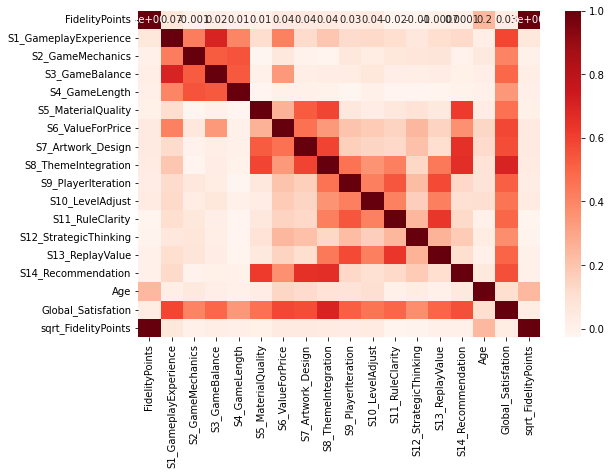

_________________________________________________________________________________________________

                                     SPLIT 6                                    
_________________________________________________________________________________________________


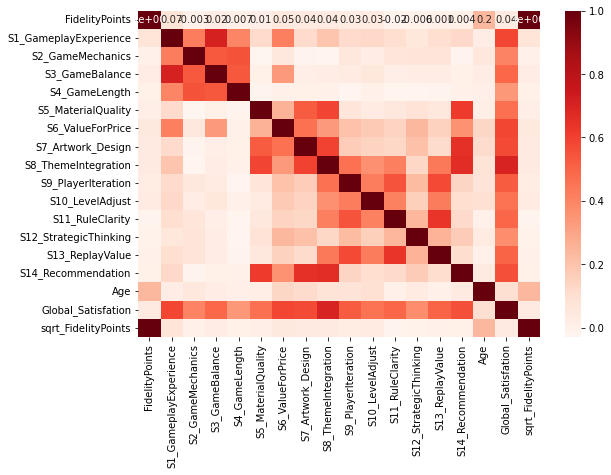

_________________________________________________________________________________________________

                                     SPLIT 7                                    
_________________________________________________________________________________________________


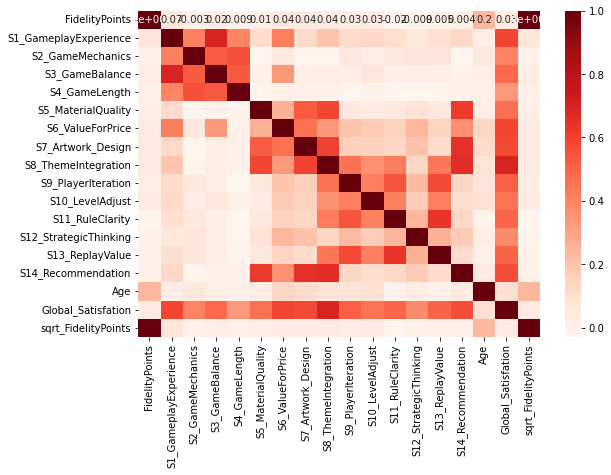

_________________________________________________________________________________________________

                                     SPLIT 8                                    
_________________________________________________________________________________________________


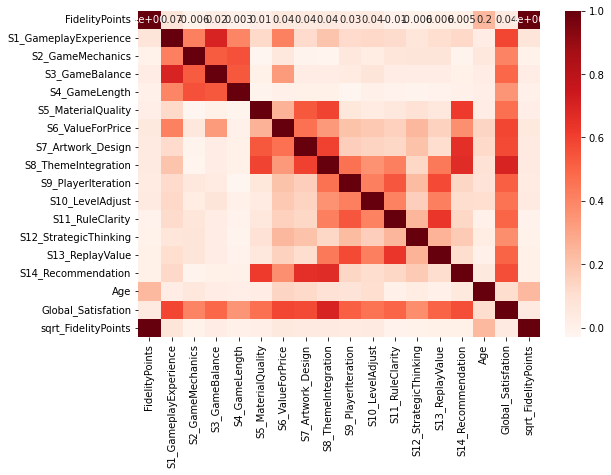

_________________________________________________________________________________________________

                                     SPLIT 9                                    
_________________________________________________________________________________________________


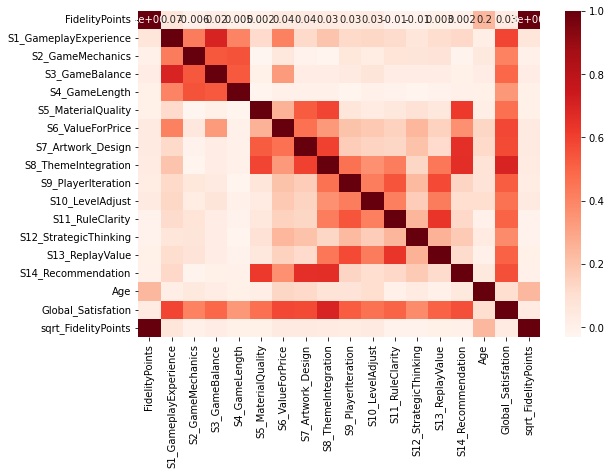

_________________________________________________________________________________________________

                                     SPLIT 10                                    
_________________________________________________________________________________________________


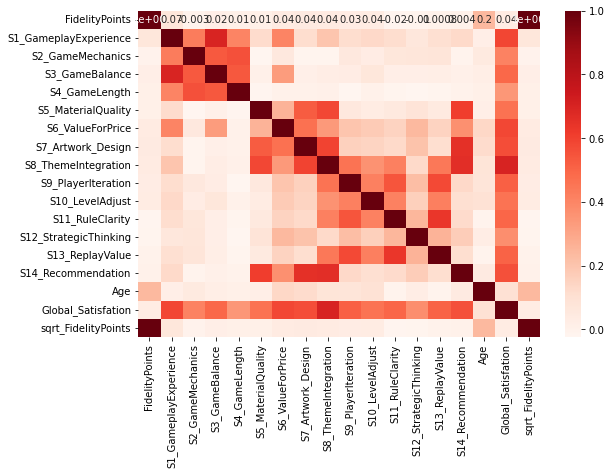

In [ ]:
redundant_features(X, y)

#### 2.8.2.3 Decision Trees (Embedded Method) - For continuous, ordinal and binary data

In [ ]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

#### 2.8.2.4 Recursive Feature Elimination (RFE) (Wrapper Method) - For continuous, ordinal and binary data

In [ ]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

#### 2.8.2.5 Lasso - For continuous and ordinal data

In [ ]:
def apply_lasso(X_train, y_train):
    X_train = X_train.drop(['Male', 'Membership_Premium', 'Newsletter_Subscription_yes'], axis = 1)
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    plot_importance(coef,'Lasso')

#### 2.8.2.6 Run RFE, Lasso and DT

In [ ]:
def select_best_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        numerical_data = X_train.drop(['Preferred_Game_Genre'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)

        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)

        # check which features to use using lasso
        print('')
        print('----------------- DT ----------------------')
        apply_dt(X_train_scaled, y_train)

        count+=1

In [ ]:
def plot_importance(variables,name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

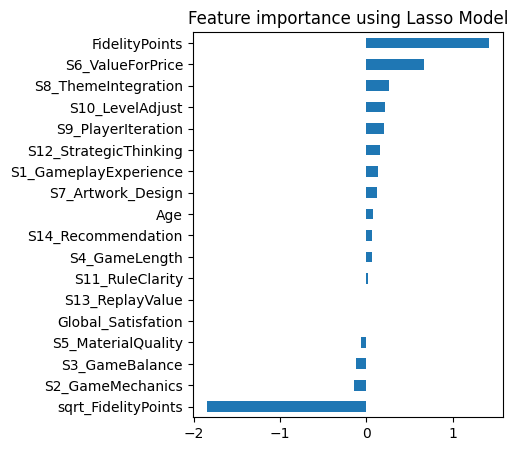


----------------- DT ----------------------


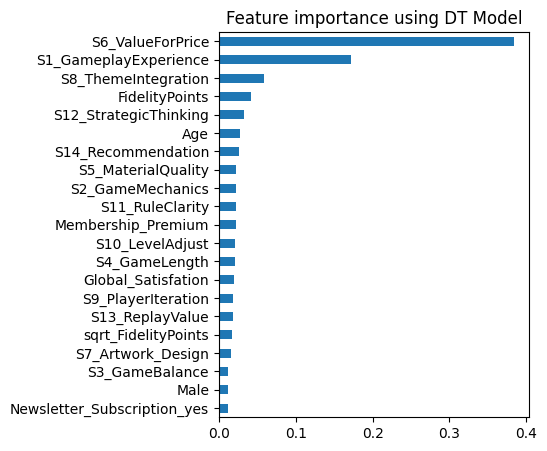

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

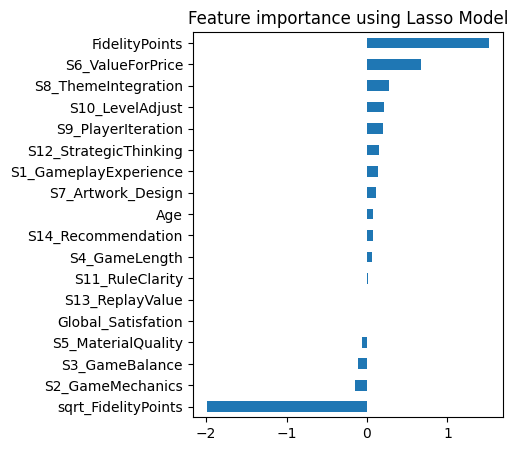


----------------- DT ----------------------


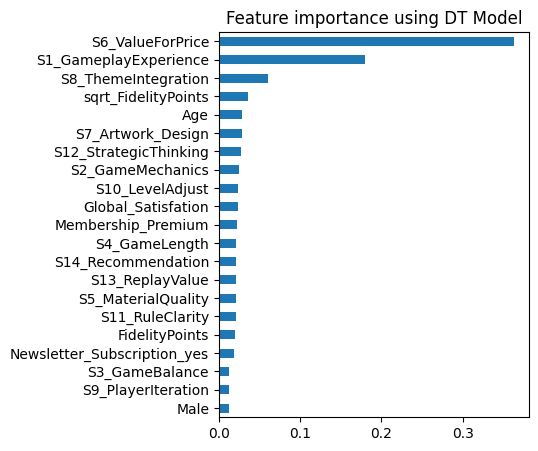

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

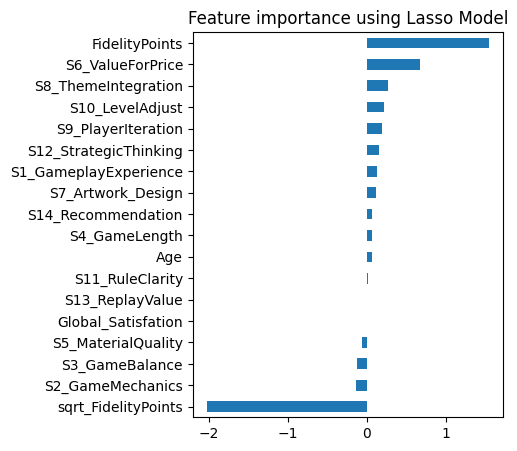


----------------- DT ----------------------


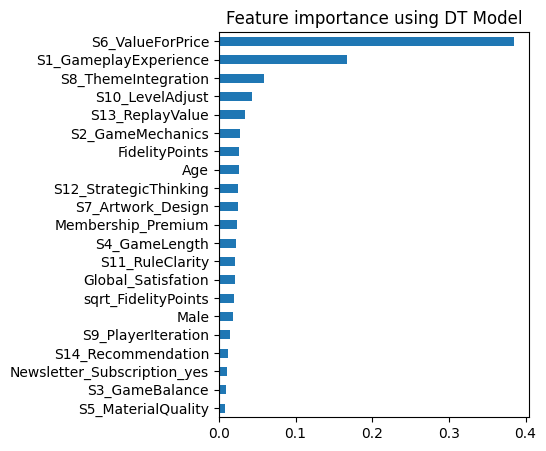

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

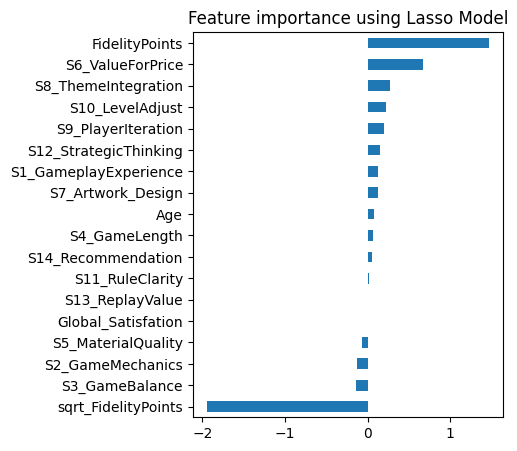


----------------- DT ----------------------


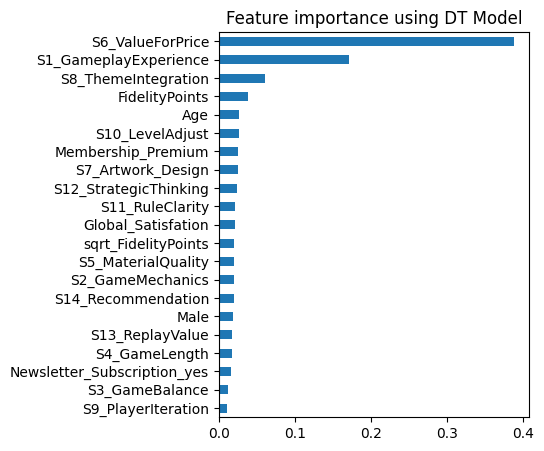

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

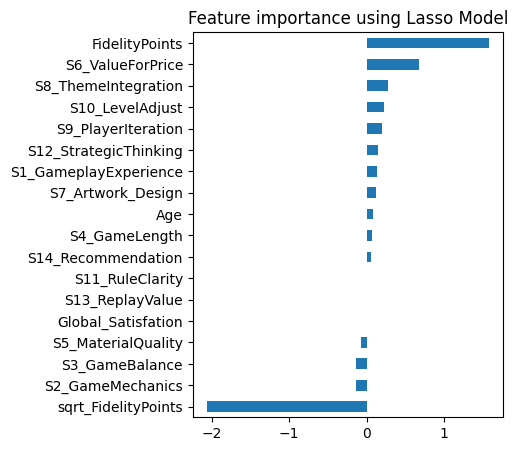


----------------- DT ----------------------


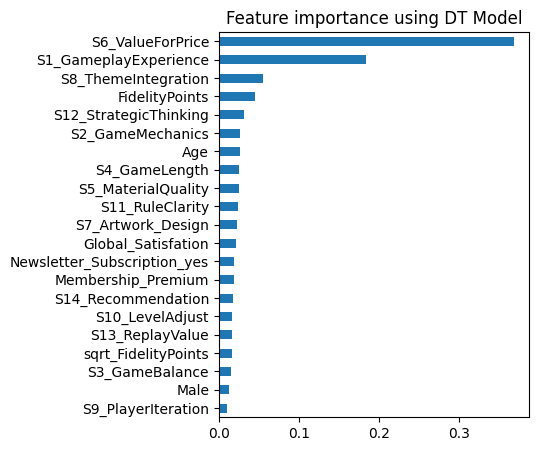

_________________________________________________________________________________________________

                                     SPLIT 6                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

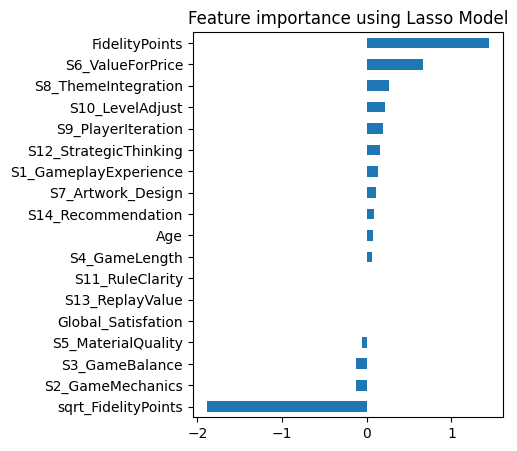


----------------- DT ----------------------


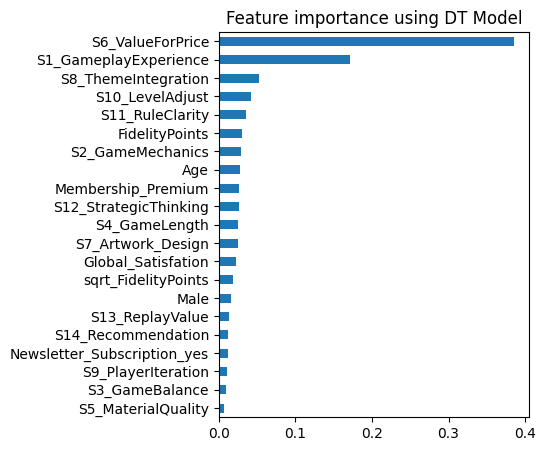

_________________________________________________________________________________________________

                                     SPLIT 7                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

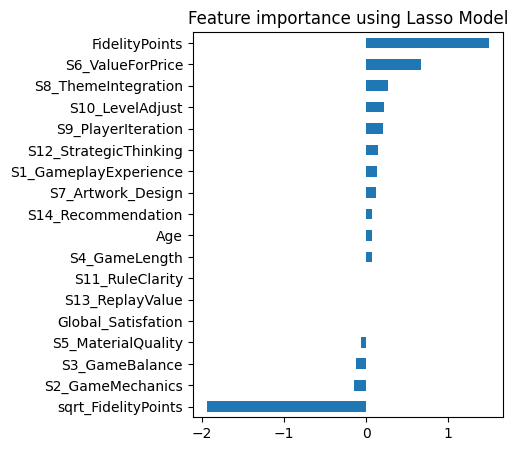


----------------- DT ----------------------


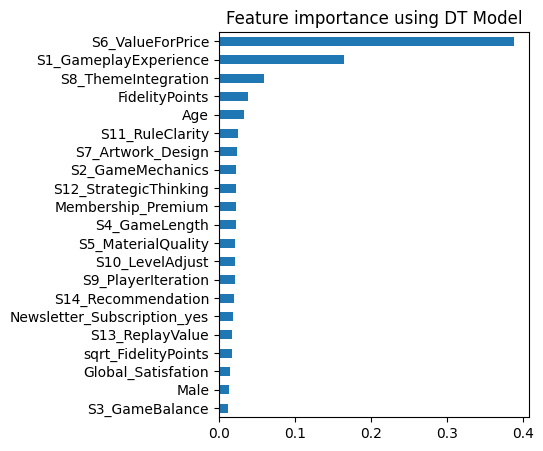

_________________________________________________________________________________________________

                                     SPLIT 8                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

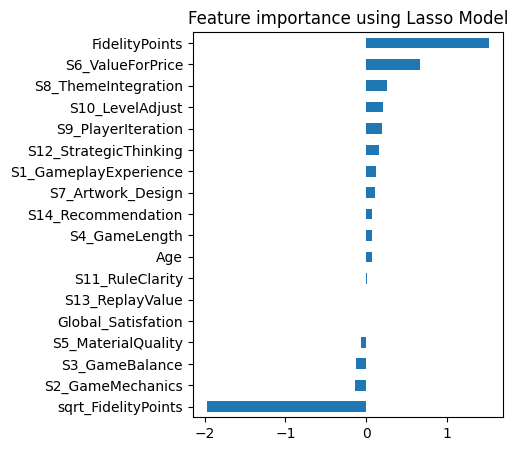


----------------- DT ----------------------


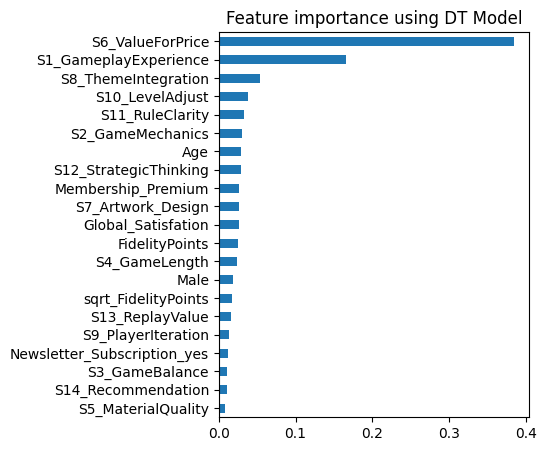

_________________________________________________________________________________________________

                                     SPLIT 9                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membership

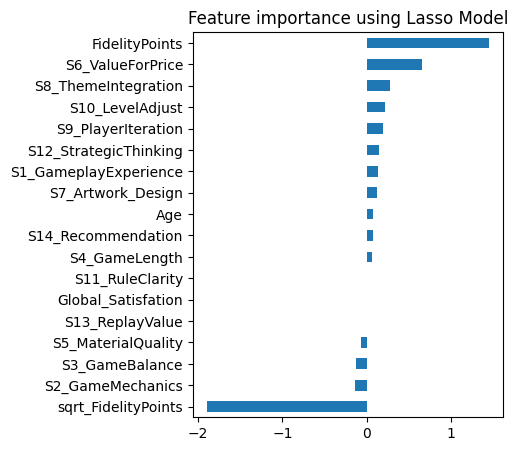


----------------- DT ----------------------


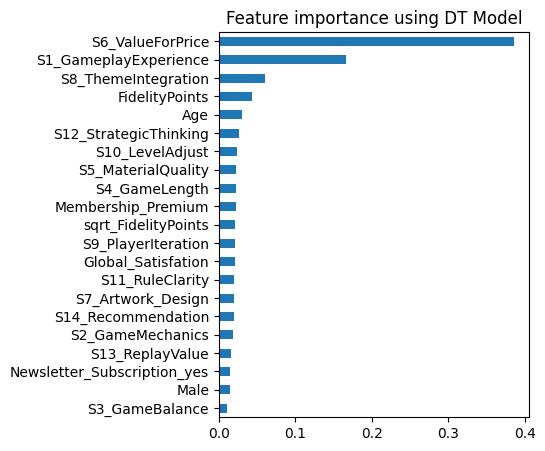

_________________________________________________________________________________________________

                                     SPLIT 10                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints                 False
S1_GameplayExperience          False
S2_GameMechanics                True
S3_GameBalance                  True
S4_GameLength                  False
S5_MaterialQuality             False
S6_ValueForPrice                True
S7_Artwork_Design              False
S8_ThemeIntegration            False
S9_PlayerIteration             False
S10_LevelAdjust                False
S11_RuleClarity                False
S12_StrategicThinking          False
S13_ReplayValue                False
S14_Recommendation             False
Male                           False
Age                            False
Global_Satisfation              True
Membershi

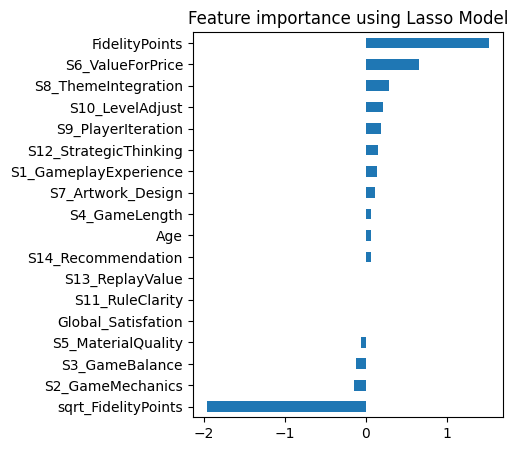


----------------- DT ----------------------


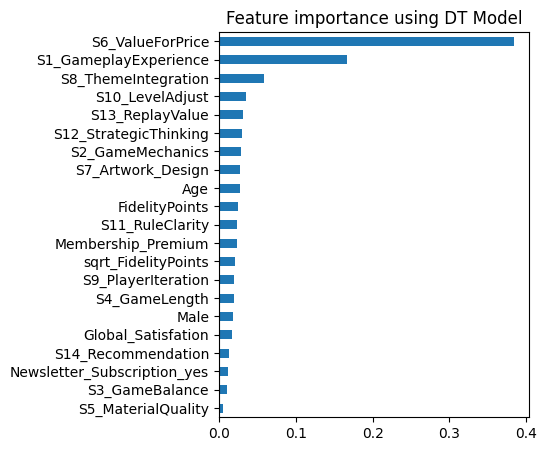

In [ ]:
select_best_features(X, y)

### 3. MIC Feature Selection

In [70]:
skf = StratifiedKFold(n_splits = 10, random_state = 99, shuffle = True)

In [71]:
# Calculate mutual information for classification
mi_scores = mutual_info_classif(X, y, random_state=0)

In [72]:
# Calculate mutual information for regression
mi_scores = mutual_info_regression(X, y, random_state=0)

In [73]:
# Create a DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the mutual information scores
print(mi_scores_df)

                          Feature  MI Score
9                S6_ValueForPrice  0.231214
5              Global_Satisfation  0.149697
6           S1_GameplayExperience  0.136971
11            S8_ThemeIntegration  0.111677
10              S7_Artwork_Design  0.106903
12             S9_PlayerIteration  0.074869
17             S14_Recommendation  0.069988
13                S10_LevelAdjust  0.067941
16                S13_ReplayValue  0.049181
2     Newsletter_Subscription_yes  0.047655
19  Preferred_Game_Genre_Strategy  0.044257
15          S12_StrategicThinking  0.041743
8                  S3_GameBalance  0.040519
14                S11_RuleClarity  0.039369
18     Preferred_Game_Genre_Party  0.031174
4                             Age  0.030149
3             sqrt_FidelityPoints  0.025312
0                            Male  0.025099
1              Membership_Premium  0.006761
7                S2_GameMechanics  0.000000


In [74]:
# Select the top 5 features
top_features = mi_scores_df.head(5)['Feature']

# Select the top features from the original dataset
X_selected = X[top_features]

In [75]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S6_ValueForPrice       15586 non-null  int64  
 1   Global_Satisfation     15586 non-null  float64
 2   S1_GameplayExperience  15586 non-null  int64  
 3   S8_ThemeIntegration    15586 non-null  int64  
 4   S7_Artwork_Design      15586 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 730.6 KB


# 4. Model & Assess (Modelling and Assessment)

## 4.1. Model Selection

In [32]:
#keep_data = one_hot_encoded_data[['Preferred_Game_Genre','Newsletter_Subscription_yes','S6_ValueForPrice','S8_ThemeIntegration','S10_LevelAdjust','Buy_product']].copy()
#all_data = one_hot_encoded_data[['Preferred_Game_Genre','Newsletter_Subscription_yes','S6_ValueForPrice','S8_ThemeIntegration','S10_LevelAdjust','FidelityPoints','S1_GameplayExperience','S9_PlayerIteration','S12_StrategicThinking','Buy_product']].copy()
#try_data = one_hot_encoded_data[['Preferred_Game_Genre','Newsletter_Subscription_yes','S6_ValueForPrice','S8_ThemeIntegration','S10_LevelAdjust','S9_PlayerIteration','S12_StrategicThinking','Buy_product']].copy()
all_data2 = one_hot_encoded_data[['Preferred_Game_Genre','Male','Membership_Premium','Newsletter_Subscription_yes','sqrt_FidelityPoints','Age',
                                  'Global_Satisfation','S1_GameplayExperience','S2_GameMechanics','S3_GameBalance','S6_ValueForPrice','S7_Artwork_Design','S8_ThemeIntegration','S9_PlayerIteration','S10_LevelAdjust','S11_RuleClarity','S12_StrategicThinking','S13_ReplayValue','S14_Recommendation','Buy_product']].copy()

In [33]:
#print(keep_data.info())
#print(all_data.info())
#print(try_data.info())
print(all_data2.info())


<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Preferred_Game_Genre         15586 non-null  object 
 1   Male                         15586 non-null  int64  
 2   Membership_Premium           15586 non-null  bool   
 3   Newsletter_Subscription_yes  15586 non-null  bool   
 4   sqrt_FidelityPoints          15586 non-null  float64
 5   Age                          15586 non-null  int64  
 6   Global_Satisfation           15586 non-null  float64
 7   S1_GameplayExperience        15586 non-null  int64  
 8   S2_GameMechanics             15586 non-null  int64  
 9   S3_GameBalance               15586 non-null  int64  
 10  S6_ValueForPrice             15586 non-null  int64  
 11  S7_Artwork_Design            15586 non-null  int64  
 12  S8_ThemeIntegration          15586 non-null  int64  
 13  S9_PlayerIteration   

In [34]:
def encode_data(dataset):

    ########################################## CREATE DUMMIES #################################################
    # Create dummies and remove one of the variables (to avoid multicollinearity)
    data_dummies = pd.get_dummies(dataset)
    data_dummies.drop('Preferred_Game_Genre_Thematic', axis = 1, inplace = True)

    return data_dummies

In [ ]:
#encode_data(keep_data)

In [38]:
#encode_data(all_data)
#encode_data(try_data)
#encode_data(all_data2)

,Male,Membership_Premium,Newsletter_Subscription_yes,sqrt_FidelityPoints,Age,Global_Satisfation,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,S6_ValueForPrice,...,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation,Buy_product,Preferred_Game_Genre_Party,Preferred_Game_Genre_Strategy
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,True,True,70.049982,50,3.285714,3,4,1,3,...,3,3,3,3,4,3,4,0,False,True
2,1,True,True,82.000000,59,3.142857,1,1,1,3,...,5,5,5,5,1,5,2,1,False,True
3,1,True,True,66.068147,51,2.714286,3,3,3,4,...,3,3,2,3,2,3,1,0,False,True
4,0,False,True,62.040309,31,3.142857,1,1,1,4,...,4,4,4,4,4,4,3,1,True,False
5,1,True,True,73.321211,35,3.571429,2,2,3,5,...,5,5,3,4,1,3,5,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,0,True,False,70.484041,36,2.714286,2,0,2,2,...,3,4,5,1,3,4,3,0,True,False
15586,0,True,False,70.498227,24,3.571429,3,3,3,3,...,5,3,1,3,4,4,5,0,True,False
15587,1,True,True,63.608176,60,3.214286,1,1,1,4,...,4,4,4,4,5,4,4,1,False,True


In [36]:
def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 10, random_state = 99, shuffle = True)
    X = data.drop('Buy_product', axis = 1)
    y = data['Buy_product'].copy()

    X = encode_data(X)

    score_train, score_val = [],[]

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale the data
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

In [37]:
def show_results(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

### 4.1.1. Compare different algorithms and select the most promising ones

In [39]:
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth = 3, random_state = 99)
model_NN = MLPClassifier(max_iter = 2000, random_state = 99)
model_LR = LogisticRegression(random_state = 1)
model_GradientBoosting = GradientBoostingClassifier(random_state = 1)
model_RandomForest = RandomForestClassifier(random_state = 1)
model_AdaBoost = AdaBoostClassifier(random_state = 1)
model_Bagging = BaggingClassifier(random_state = 1)
model_NN_MLP = MLPClassifier(random_state = 1)
model_ExtraTrees = ExtraTreesClassifier(random_state = 1)
model_SVC = SVC(random_state = 1)

In [ ]:
df_all2 = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN','DT','NN','Logistic Regression','GradientBoosting','RandomForest','AdaBoost','Bagging','NN_MLP','ExtraTrees','SVC'])

In [ ]:
show_results(df_all2, all_data2, model_KNN, model_DT, model_NN, model_LR, model_GradientBoosting,
             model_RandomForest, model_AdaBoost, model_Bagging, model_NN_MLP, model_ExtraTrees, model_SVC)

,Train,Validation
KNN,0.938+/-0.0,0.913+/-0.01
DT,0.862+/-0.0,0.862+/-0.01
NN,0.954+/-0.0,0.938+/-0.01
Logistic Regression,0.845+/-0.0,0.845+/-0.01
GradientBoosting,0.933+/-0.0,0.93+/-0.01
RandomForest,1.0+/-0.0,0.941+/-0.01
AdaBoost,0.904+/-0.0,0.902+/-0.01
Bagging,0.996+/-0.0,0.935+/-0.01
NN_MLP,0.948+/-0.0,0.938+/-0.01
ExtraTrees,1.0+/-0.0,0.943+/-0.01


In [ ]:
#df_keep = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN','DT','NN'])

In [ ]:
#show_results(df_keep, keep_data, model_KNN, model_DT, model_NN)

,Train,Validation
KNN,0.86+/-0.0,0.849+/-0.01
DT,0.834+/-0.0,0.834+/-0.01
NN,0.863+/-0.0,0.861+/-0.01


**Conclusion**
Based on the metrics provided:

- Neural Network (NN) is the best choice because it has the highest validation accuracy (86.1%) and consistent performance (low standard deviation).

- K-Nearest Neighbors (KNN) is also a strong candidate with a high validation accuracy (84.9%) and consistent performance, but it slightly overfits compared to NN.

- Decision Tree (DT), while having no overfitting, has the lowest validation accuracy (83.4%).

Therefore, the Neural Network (NN) is likely the best model to choose based on this evaluation. It provides the best balance between high accuracy and minimal overfitting.

In [ ]:
#df_try = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN','DT','NN'])

In [ ]:
#show_results(df_try, try_data, model_KNN, model_DT, model_NN)

,Train,Validation
KNN,0.893+/-0.0,0.857+/-0.01
DT,0.833+/-0.0,0.832+/-0.01
NN,0.877+/-0.0,0.873+/-0.01


**Conclusion**
Based on the metrics provided:

- Neural Network (NN) is the best choice because it has the highest validation accuracy (87.3%) and consistent performance with minimal overfitting.
- K-Nearest Neighbors (KNN) is also a strong candidate with a high validation accuracy (85.7%) and consistent performance, but it slightly overfits compared to NN.
- Decision Tree (DT), while having minimal overfitting, has the lowest validation accuracy (83.2%).

Therefore, the Neural Network (NN) is likely the best model to choose based on this evaluation. It provides the best balance between high accuracy and minimal overfitting.

## 4.2. Model Optimization

In [40]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

### 4.2.1. K-Nearest Neighbor

In [41]:
def get_models_knn(data, values):
    models = dict()
    results_train, results_val = [],[]

    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)

    print(results_train)
    print(results_val)


    return results_train, results_val

[1.0, 0.95, 0.938, 0.932, 0.928, 0.924]
[0.9, 0.911, 0.913, 0.913, 0.912, 0.911]


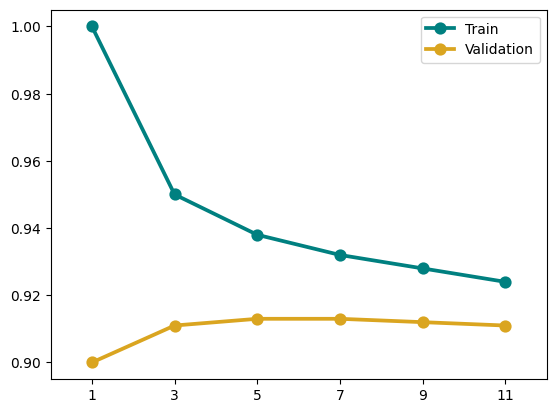

In [ ]:
values_try = [1,3,5,7,9,11]
results_train, results_val = get_models_knn(all_data2, values_try)
point_plot(results_train, results_val, values_try)

__CONCLUSION__: <br>
It seems that the best value of number of neighbors to keep (considering the f1 score performance in validation) is 7 neighbors.

In [42]:
final_model_knn = KNeighborsClassifier(n_neighbors = 7)

### 4.2.2. Decision Trees

In [43]:
def get_models_dt(data, values):
    models = dict()
    results_train, results_val = [],[]

    # create the instances of each model with different values
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth = value, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)

    return results_train, results_val

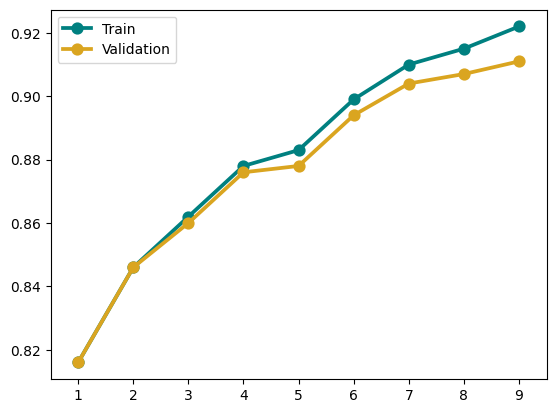

In [ ]:
values_try = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(all_data2, values_try)
point_plot(results_train, results_val, values_try)

__CONCLUSION__: <br>
It seems that the best value of levels to keep is 4 levels.

In [44]:
final_model_dt = DecisionTreeClassifier(max_depth = 4, random_state = 99)

#### 4.2.2.1. ADDITIONAL: HOW TO VISUALIZE TREES

In [45]:
data = all_data2.copy()

X = data.drop(['Buy_product'], axis = 1)
y = data['Buy_product'].copy()

X= encode_data(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)

In [46]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train.columns,
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [47]:
dt_visual = DecisionTreeClassifier(max_depth = 4, random_state = 99).fit(X_train, y_train)

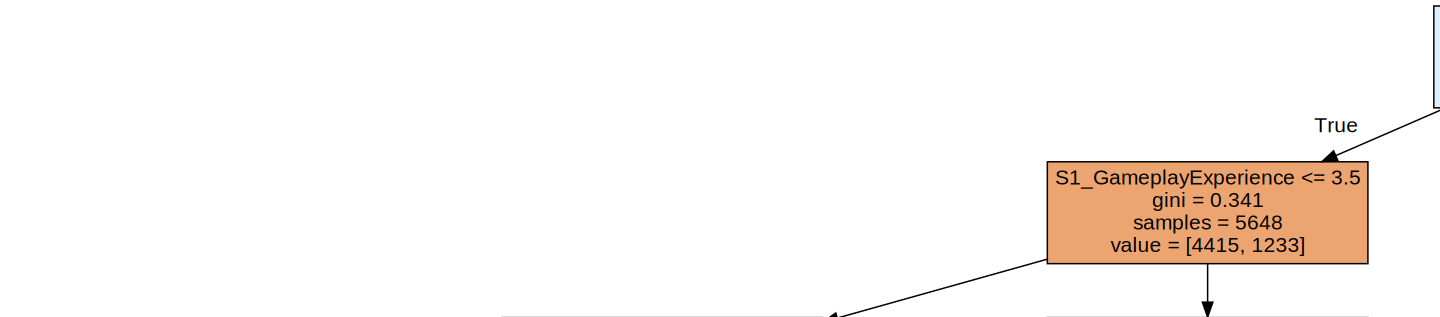

In [48]:
plot_tree(dt_visual)

### 4.2.3. Neural Networks

In [49]:
def get_models_nn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

In [ ]:
values_try = [(10),(100),(150)]
#(100,100),(200),(300),(150,150),(350),(400)
results_train, results_val, names = get_models_nn(all_data2, values_try)
point_plot(results_train, results_val, names)

### 4.2.4. Extra Trees

In [50]:
def get_models_et(data, values):
    models = dict()
    results_train, results_val, names = [], [], []

    # Create the instances of each model with different values
    for value in values:
        models[str(value)] = ExtraTreesClassifier(n_estimators=value, random_state=42)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

In [51]:
def point_plot(results_train, results_val, names):
    plt.figure(figsize=(10, 5))
    plt.plot(names, results_train, label='Train Score', marker='o')
    plt.plot(names, results_val, label='Validation Score', marker='o')
    plt.xlabel('Model Hyperparameters')
    plt.ylabel('Score')
    plt.title('Extra Trees Classifier Performance')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

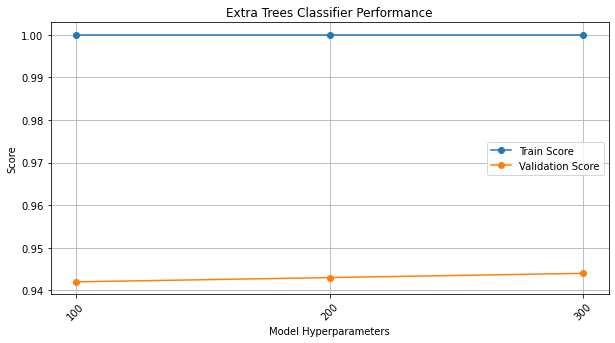

In [ ]:
values_try = [100, 200, 300]
results_train, results_val, names = get_models_et(all_data2, values_try)
point_plot(results_train, results_val, names)

In [52]:
final_model_et = ExtraTreesClassifier(n_estimators = 300, random_state = 99)

### 4.2.4. RandomSearch

##### 4.2.4.1 NN

In [53]:
data = all_data2.copy()

X_data = data.drop(['Buy_product'], axis = 1)
y_data = data['Buy_product'].copy()

X_data = encode_data(X_data)
scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [54]:
nn = MLPClassifier(max_iter = 2000, random_state = 99)

In [ ]:
parameter_space_random = {
    'hidden_layer_sizes': [(280),(290),(300),(310),(320)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu']
}

In [ ]:
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random,
                                   scoring = 'f1', cv=5, random_state = 99)

In [ ]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': 320, 'activation': 'relu'}
Best Score:  0.9073060182231183


##### 4.2.4.1 RF

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf,
                                      n_iter=100, scoring='f1', cv=5, random_state=99, n_jobs=-1, verbose=2)

In [ ]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=99, scoring='f1_macro', verbose=2)

In [ ]:
print("Best Hyperparameters: ", random_search_rf.best_params_)
print("Best Score: ", random_search_rf.best_score_)

Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best Score:  1.0


### 4.2.5. GridSearch

##### 4.2.5.1 NN

In [ ]:
parameter_space_grid_nn = {
    'hidden_layer_sizes': [(320)],
    'learning_rate_init': [0.001, 0.005],
    'solver': ['adam'],
    'activation': ['relu','tanh']
}

In [ ]:
grid_search = GridSearchCV(nn, parameter_space_grid_nn, scoring = 'f1', return_train_score = True, cv = 5)

In [ ]:
grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': 320, 'learning_rate': 'invscaling', 'learning_rate_init': 0.005, 'solver': 'adam'}
Best Score:  0.9096233328314964


In [56]:
final_model_nn = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (320),
                               learning_rate = 'invscaling',
                               learning_rate_init = 0.005,
                               solver = 'adam', max_iter = 2000, random_state = 99)

##### 4.2.5.2 ET

In [ ]:
param_grid_ET = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the GridSearchCV object
grid_search_ET = GridSearchCV(model_ExtraTrees, param_grid_ET, scoring='f1',return_train_score = True, cv=5)

# Fit the grid search to the data
grid_search_ET.fit(X_data, y_data)

# Print the best parameters and best score
print("Best Parameters for Neural Network:", grid_search_ET.best_params_)
print("Best CV f1 for Neural Network:", grid_search_ET.best_score_)

In [57]:
final_model_et = ExtraTreesClassifier(n_estimators = 200,
                                min_samples_split = 5,
                                min_samples_leaf = 1,
                                max_features = 'log2',
                                max_depth = 35)

##### 4.2.5.2 RF

In [ ]:
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the GridSearchCV object
grid_search_RF = GridSearchCV(model_RandomForest, param_grid_RF, scoring='f1',return_train_score = True, cv=5)

# Fit the grid search to the data
grid_search_RF.fit(X_data, y_data)

# Print the best parameters and best score
print("Best Parameters for Neural Network:", grid_search_RF.best_params_)
print("Best CV f1 for Neural Network:", grid_search_RF.best_score_)

In [58]:
final_model_rf = RandomForestClassifier(n_estimators = 300,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                max_features = 'sqrt',
                                max_depth = 25)

##### 4.2.5.2 Ensemble - Voting Classifier

In [59]:
# Define the Voting Classifier with tuned models
final_model_vc = VotingClassifier(estimators=[
    ('rf', final_model_rf),
    ('et', final_model_et),
    ('nn', final_model_nn)
], voting='soft')


### 4.2.6. Select the winner model

</a>

#### 4.2.6.1. COMPARE THE PERFORMANCE

In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best RF','Best VC', 'Best NN', 'Best ET'])
show_results(df_final_models, all_data2, final_model_rf, final_model_vc, final_model_nn, final_model_et)

,Train,Validation
Best RF,1.0+/-0.0,0.941+/-0.01
Best VC,0.996+/-0.0,0.945+/-0.01
Best NN,0.973+/-0.0,0.938+/-0.01
Best ET,0.999+/-0.0,0.943+/-0.01


#### __4.2.6.2. PLOT A ROC CURVE__

In [60]:
data = all_data2.copy()

X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [61]:
X_data = encode_data(X_data)

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                  train_size = 0.8,
                                                  random_state = 99,
                                                  stratify = y_data)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)


model_vc = final_model_vc.fit(X_train, y_train)
model_rf = final_model_dt.fit(X_train, y_train)
model_nn = final_model_nn.fit(X_train, y_train)
model_et = final_model_et.fit(X_train, y_train)


In [63]:
prob_modelVC =  model_vc.predict_proba(X_val)
prob_modelRF =  model_rf.predict_proba(X_val)
prob_modelNN =  model_nn.predict_proba(X_val)
prob_modelET =  model_et.predict_proba(X_val)


In [64]:
fpr_modelVC, tpr_modelVC, thresholds_modelVC = roc_curve(y_val, prob_modelVC[:,1])
fpr_modelRF, tpr_modelRF, thresholds_modelRF = roc_curve(y_val, prob_modelRF[:,1])
fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val, prob_modelNN[:,1])
fpr_modelET, tpr_modelET, thresholds_modelET = roc_curve(y_val, prob_modelET[:,1])


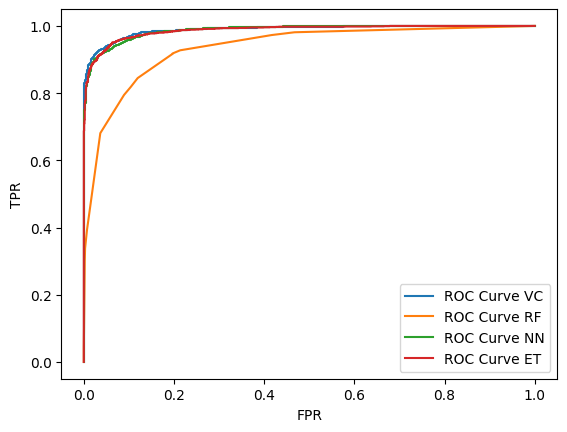

In [65]:
plt.plot(fpr_modelVC, tpr_modelVC, label="ROC Curve VC")
plt.plot(fpr_modelRF, tpr_modelRF, label="ROC Curve RF")
plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
plt.plot(fpr_modelET, tpr_modelET, label="ROC Curve ET")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

#### 4.2.6.2. Calculate ROC_AUC_SCORE

In [ ]:
# Alternatively, you can use roc_auc_score
roc_auc_modelVC = roc_auc_score(y_val, prob_modelVC[:, 1])
roc_auc_modelRF = roc_auc_score(y_val, prob_modelRF[:, 1])
roc_auc_modelNN = roc_auc_score(y_val, prob_modelNN[:, 1])
roc_auc_modelET = roc_auc_score(y_val, prob_modelET[:, 1])
print(roc_auc_modelVC)
print(roc_auc_modelRF)
print(roc_auc_modelNN)
print(roc_auc_modelET)

0.9889165977400357
0.9353103356778752
0.9867598679096262
0.9868371901151956


__CONCLUSION__ <br>
- While considering the roc curve and the AUC, it seems that the Voting Classifier is the one that achieves a better result. A higher AUC value generally indicates a better performing model. It means the model is better at distinguishing between the positive and negative classes across different threshold levels.

#### 4.2.6.3. CHANGE THE THRESHOLD

In [66]:
final_model = final_model_et.fit(X_train, y_train)

In [ ]:
predict_proba = final_model.predict_proba(X_val)
predict_proba

array([[0.00277778, 0.99722222],
       [0.04006054, 0.95993946],
       [0.9961111 , 0.0038889 ],
       ...,
       [0.98680022, 0.01319978],
       [0.91151283, 0.08848717],
       [0.11051704, 0.88948296]])

Best Threshold=0.557528, F-Score=0.949


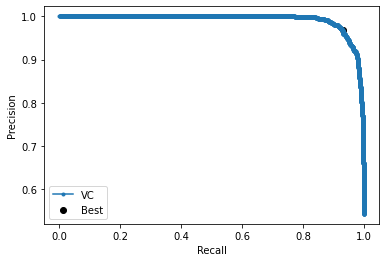

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, predict_proba[:,1])

# Compute F1 score, avoid division by zero
fscore = np.where((precision + recall) > 0, (2 * precision * recall) / (precision + recall), 0)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

plt.plot(recall, precision, marker='.', label='VC')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# 5. Deploy

In [ ]:
train = all_data2.copy()

X_train = train.drop(['Buy_product'], axis = 1)
y_train = train['Buy_product']

## 5.1. Import test data and apply transformations

In [ ]:
test = pd.read_csv('test.csv')
test.set_index(['Cust_ID'], inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5195 entries, 30000 to 35194
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     5195 non-null   object
 1   Newsletter_Subscription  5195 non-null   object
 2   Year_Birth               5195 non-null   int64 
 3   Membership               5195 non-null   object
 4   Preferred_Game_Genre     5195 non-null   object
 5   FidelityPoints           5195 non-null   int64 
 6   S1_GameplayExperience    5195 non-null   int64 
 7   S2_GameMechanics         5195 non-null   int64 
 8   S3_GameBalance           5195 non-null   int64 
 9   S4_GameLength            5195 non-null   int64 
 10  S5_MaterialQuality       5195 non-null   int64 
 11  S6_ValueForPrice         5195 non-null   int64 
 12  S7_Artwork_Design        5195 non-null   int64 
 13  S8_ThemeIntegration      5195 non-null   int64 
 14  S9_PlayerIteration       5195 non-null  

In [ ]:
test['sqrt_FidelityPoints'] = test['FidelityPoints'] ** 0.5

In [ ]:
from datetime import date
test['Age'] = date.today().year - test['Year_Birth']

In [ ]:
score_columns = [
    'S1_GameplayExperience', 'S2_GameMechanics', 'S3_GameBalance', 'S4_GameLength',
    'S5_MaterialQuality', 'S6_ValueForPrice', 'S7_Artwork_Design', 'S8_ThemeIntegration',
    'S9_PlayerIteration', 'S10_LevelAdjust', 'S11_RuleClarity', 'S12_StrategicThinking',
    'S13_ReplayValue', 'S14_Recommendation'
]
test['Global_Satisfation'] = test[score_columns].mean(axis=1)

In [ ]:
test['Male'] = test['Name'].apply(lambda x: 1 if x.startswith('Mr') else 0)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5195 entries, 30000 to 35194
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     5195 non-null   object 
 1   Newsletter_Subscription  5195 non-null   object 
 2   Year_Birth               5195 non-null   int64  
 3   Membership               5195 non-null   object 
 4   Preferred_Game_Genre     5195 non-null   object 
 5   FidelityPoints           5195 non-null   int64  
 6   S1_GameplayExperience    5195 non-null   int64  
 7   S2_GameMechanics         5195 non-null   int64  
 8   S3_GameBalance           5195 non-null   int64  
 9   S4_GameLength            5195 non-null   int64  
 10  S5_MaterialQuality       5195 non-null   int64  
 11  S6_ValueForPrice         5195 non-null   int64  
 12  S7_Artwork_Design        5195 non-null   int64  
 13  S8_ThemeIntegration      5195 non-null   int64  
 14  S9_PlayerIteration      

In [ ]:
print(test['Preferred_Game_Genre'].value_counts())
test['Newsletter_Subscription'].value_counts()

Preferred_Game_Genre
Strategy    2398
Party       2392
Thematic     405
Name: count, dtype: int64


Newsletter_Subscription
yes    4267
no      928
Name: count, dtype: int64

In [ ]:
# Initialize lists to store categorical and numerical variables
test_categorical_columns = []
test_numerical_columns = []

# Iterate over columns
for column in test.columns:
    # Check if the column data type is object (categorical)
    if test[column].dtype == 'object':
        test_categorical_columns.append(column)
    # Check if the column data type is numeric (int or float)
    elif test[column].dtype in ['int64', 'float64']:
        test_numerical_columns.append(column)


# Print identified categorical, numerical, and date columns
print("Test Categorical columns:", test_categorical_columns)
print("Test Numerical columns:", test_numerical_columns)

Test Categorical columns: ['Name', 'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre']
Test Numerical columns: ['Year_Birth', 'FidelityPoints', 'S1_GameplayExperience', 'S2_GameMechanics', 'S3_GameBalance', 'S4_GameLength', 'S5_MaterialQuality', 'S6_ValueForPrice', 'S7_Artwork_Design', 'S8_ThemeIntegration', 'S9_PlayerIteration', 'S10_LevelAdjust', 'S11_RuleClarity', 'S12_StrategicThinking', 'S13_ReplayValue', 'S14_Recommendation', 'sqrt_FidelityPoints', 'Age', 'Global_Satisfation', 'Male']


In [ ]:
#Get the main descriptive statistics for all the numeric variables
test.describe()

,Year_Birth,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,S4_GameLength,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation,sqrt_FidelityPoints,Age,Global_Satisfation,Male
count,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000
mean,1981.590375,5031.689509,2.850626,3.006930,2.884119,3.018094,3.265063,3.388258,3.531473,3.476420,3.454475,3.497401,3.692204,3.357844,3.711646,3.347449,70.516178,42.409625,3.320143,0.493359
std,15.171122,1026.748250,1.384223,1.518196,1.436115,1.306090,1.307542,1.341690,1.303531,1.298073,1.274584,1.287115,1.155326,1.263340,1.139825,1.299407,7.692172,15.171122,0.662681,0.500004
min,1941.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,7.000000,10.000000,1.214286,0.000000
25%,1970.000000,4491.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,67.014924,30.000000,2.857143,0.000000
50%,1981.000000,5088.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,71.330218,43.000000,3.357143,0.000000
75%,1994.000000,5640.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,75.103262,54.000000,3.785714,1.000000
max,2014.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,83.366660,83.000000,4.928571,1.000000


In [ ]:
# Statistical Analysis for Categorical Features
test[test_categorical_columns].describe()

,Name,Newsletter_Subscription,Membership,Preferred_Game_Genre
count,5195,5195,5195,5195
unique,4999,2,2,3
top,Mr. Michael Williams,yes,Premium,Strategy
freq,6,4267,3512,2398


In [ ]:
test[test_numerical_columns].skew()

Year_Birth               0.024716
FidelityPoints          -0.504030
S1_GameplayExperience   -0.092002
S2_GameMechanics        -0.270297
S3_GameBalance          -0.134340
S4_GameLength           -0.063537
S5_MaterialQuality      -0.210142
S6_ValueForPrice        -0.582588
S7_Artwork_Design       -0.583354
S8_ThemeIntegration     -0.506107
S9_PlayerIteration      -0.504636
S10_LevelAdjust         -0.522925
S11_RuleClarity         -0.748110
S12_StrategicThinking   -0.406388
S13_ReplayValue         -0.751495
S14_Recommendation      -0.367664
sqrt_FidelityPoints     -1.101438
Age                     -0.024716
Global_Satisfation      -0.134689
Male                     0.026574
dtype: float64

In [ ]:
test[test_numerical_columns].skew()

Year_Birth               0.024716
FidelityPoints          -0.504030
S1_GameplayExperience   -0.092002
S2_GameMechanics        -0.270297
S3_GameBalance          -0.134340
S4_GameLength           -0.063537
S5_MaterialQuality      -0.210142
S6_ValueForPrice        -0.582588
S7_Artwork_Design       -0.583354
S8_ThemeIntegration     -0.506107
S9_PlayerIteration      -0.504636
S10_LevelAdjust         -0.522925
S11_RuleClarity         -0.748110
S12_StrategicThinking   -0.406388
S13_ReplayValue         -0.751495
S14_Recommendation      -0.367664
sqrt_FidelityPoints     -1.101438
Age                     -0.024716
Global_Satisfation      -0.134689
Male                     0.026574
dtype: float64

In [ ]:
#Check how many missing values we have in the dataset
test.isna().sum()

Name                       0
Newsletter_Subscription    0
Year_Birth                 0
Membership                 0
Preferred_Game_Genre       0
FidelityPoints             0
S1_GameplayExperience      0
S2_GameMechanics           0
S3_GameBalance             0
S4_GameLength              0
S5_MaterialQuality         0
S6_ValueForPrice           0
S7_Artwork_Design          0
S8_ThemeIntegration        0
S9_PlayerIteration         0
S10_LevelAdjust            0
S11_RuleClarity            0
S12_StrategicThinking      0
S13_ReplayValue            0
S14_Recommendation         0
sqrt_FidelityPoints        0
Age                        0
Global_Satisfation         0
Male                       0
dtype: int64

In [ ]:
one_hot_encoded_test = []
one_hot_encoded_test = pd.get_dummies(test, columns = ['Newsletter_Subscription', 'Membership'])
print(one_hot_encoded_test)

                          Name  Year_Birth Preferred_Game_Genre  \
Cust_ID                                                           
30000      Mr. Brandon Aguirre        1956                Party   
30001        Mr. Mathew Howard        2004                Party   
30002         Mr. Brian Peters        1992             Strategy   
30003     Mr. Robert Henderson        1986                Party   
30004      Ms. Stephanie Drake        1970                Party   
...                        ...         ...                  ...   
35190       Ms. Jamie Benjamin        1959             Strategy   
35191         Mr. Tim Martinez        1971                Party   
35192         Mr. Michael Webb        1954                Party   
35193           Mr. Nathan Ray        1978                Party   
35194    Mr. Kristopher Acosta        1981             Strategy   

         FidelityPoints  S1_GameplayExperience  S2_GameMechanics  \
Cust_ID                                                     

In [ ]:
one_hot_encoded_test.drop(['Membership_Non-Premium', 'Newsletter_Subscription_no'], axis = 1, inplace = True)
one_hot_encoded_test.drop(['Name', 'Year_Birth','S4_GameLength','S5_MaterialQuality', 'FidelityPoints'], axis = 1, inplace = True)

In [ ]:
all_data2_test = one_hot_encoded_test[['Preferred_Game_Genre','Male','Membership_Premium','Newsletter_Subscription_yes',
                                  'sqrt_FidelityPoints','Age','Global_Satisfation','S1_GameplayExperience',
                                  'S2_GameMechanics','S3_GameBalance','S6_ValueForPrice','S7_Artwork_Design',
                                  'S8_ThemeIntegration','S9_PlayerIteration','S10_LevelAdjust','S11_RuleClarity',
                                  'S12_StrategicThinking','S13_ReplayValue','S14_Recommendation']].copy()

In [ ]:
print(all_data2_test.info())
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5195 entries, 30000 to 35194
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Preferred_Game_Genre         5195 non-null   object 
 1   Male                         5195 non-null   int64  
 2   Membership_Premium           5195 non-null   bool   
 3   Newsletter_Subscription_yes  5195 non-null   bool   
 4   sqrt_FidelityPoints          5195 non-null   float64
 5   Age                          5195 non-null   int64  
 6   Global_Satisfation           5195 non-null   float64
 7   S1_GameplayExperience        5195 non-null   int64  
 8   S2_GameMechanics             5195 non-null   int64  
 9   S3_GameBalance               5195 non-null   int64  
 10  S6_ValueForPrice             5195 non-null   int64  
 11  S7_Artwork_Design            5195 non-null   int64  
 12  S8_ThemeIntegration          5195 non-null   int64  
 13  S9_PlayerIteration

In [ ]:
train = encode_data(X_train)
test = encode_data(all_data2_test)

In [ ]:
print(test.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5195 entries, 30000 to 35194
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Male                           5195 non-null   int64  
 1   Membership_Premium             5195 non-null   bool   
 2   Newsletter_Subscription_yes    5195 non-null   bool   
 3   sqrt_FidelityPoints            5195 non-null   float64
 4   Age                            5195 non-null   int64  
 5   Global_Satisfation             5195 non-null   float64
 6   S1_GameplayExperience          5195 non-null   int64  
 7   S2_GameMechanics               5195 non-null   int64  
 8   S3_GameBalance                 5195 non-null   int64  
 9   S6_ValueForPrice               5195 non-null   int64  
 10  S7_Artwork_Design              5195 non-null   int64  
 11  S8_ThemeIntegration            5195 non-null   int64  
 12  S9_PlayerIteration             5195 non-null   i

In [ ]:
scaler = MinMaxScaler().fit(train)
train_scaled = pd.DataFrame(scaler.transform(train), columns = train.columns)
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns, index=test.index)

In [ ]:
final_model = final_model_vc.fit(train_scaled, y_train)

In [ ]:
final_model

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=25,
                                                     n_estimators=300)),
                             ('et',
                              ExtraTreesClassifier(max_depth=35,
                                                   max_features='log2',
                                                   min_samples_split=5,
                                                   n_estimators=200)),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=320,
                                            learning_rate='invscaling',
                                            learning_rate_init=0.005,
                                            max_iter=2000, random_state=99))],
                 voting='soft')

## 5.2. Obtain Predictions on the test data from your final model

In [ ]:
final_model.predict(test_scaled) # the method predict() will predict the classes of your target when the threshold = 0.5

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
predict_proba_test = final_model.predict_proba(test_scaled)
predict_proba_test

array([[9.98472222e-01, 1.52777806e-03],
       [9.68333333e-01, 3.16666667e-02],
       [1.45842142e-01, 8.54157858e-01],
       ...,
       [9.58369087e-01, 4.16309131e-02],
       [8.91250000e-01, 1.08750000e-01],
       [5.38958493e-09, 9.99999995e-01]])

In [ ]:
final_pred = []

for value in predict_proba_test[:,1]:
    if (value<0.557528):
        final_pred.append(1)
    else:
        final_pred.append(0)

final_pred

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,


## 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file


In [ ]:
answer = pd.DataFrame()
answer['Cust_ID'] = test.index
answer['Buy_product'] = final_pred
answer.head(20)

,Cust_ID,Buy_product
0,30000,1
1,30001,1
2,30002,0
3,30003,1
4,30004,0
5,30005,0
6,30006,1
7,30007,0
8,30008,1
9,30009,1


In [ ]:
answer.shape

(5195, 2)

In [ ]:
answer.to_csv('answer.csv', index = False)